# Spotify Analysis: Grouping songs to build custom playlists

## Problem Statement:
<p>Spotify has the capability to build custom playlists (known as Daily Mixes) for its users based on their streaming history. Each of these custom playlists consist of songs that share similarities. Therefore, Spotify must be able to analyze the songs in its library to build these custom playlists.</p>

## Research Question:
<p>How does Spotify use song/track data to build custom playlists for its users?</p>

## Dataset:
<p><a href="https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset![image.png](attachment:image.png)">Spotify Tracks Dataset</a></p>
<p>This dataset contains a sample of the tracks from Spotify's extensive library. It was obtained using Spotify's API.</p>

## Data preparation

### Import libraries
<p>For this project, several libraries will have to be imported.</p>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats

In [2]:
# Import dimensionality reduction algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
# Import Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [4]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [5]:
# Importing StratifiedKFold for managing inbalanced datasets
from sklearn.model_selection import StratifiedKFold

In [6]:
# Import the statistics module
import statistics

In [7]:
# Import the preprocessing module
from sklearn import preprocessing

In [8]:
# Import standardization technique to normalize the data
from sklearn.preprocessing import StandardScaler

In [9]:
# Import the modules for splitting data for training and testing
from sklearn.model_selection import train_test_split

In [10]:
# Import the GridSearchCV module for parameter optimization
from sklearn.model_selection import GridSearchCV

In [11]:
# Importing metrics for evaluation
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

In [12]:
# Import the permutation importance module
from sklearn.inspection import permutation_importance

### Import the dataset

<p>The 'spotify_tracks.csv' file will be loaded into the notebook.</p>

In [13]:
# Import the dataset
df = pd.read_csv('Datasets/spotify_tracks.csv', index_col=0)

# Get the size of the dataset
df.shape

(114000, 20)

<p>This dataset contains 114,000 observations (or tracks) and 20 columns (or variables/features).</p>

#### Display the first few records of the dataset

<p>This is a snapshot of the dataset.</p>

In [14]:
# Display the first 10 records of the dataset
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


### Column names and data types

In [15]:
# Return all column names and their data types
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

<p>This dataset is comprised of a mix of numerical and descriptive features with one boolean type (explicit).</p>

### Unique column values

In [16]:
df.nunique(axis=0)

track_id            89741
artists             31437
album_name          46579
track_name          73602
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

<p>This list displays the count of values for each feature in the dataset. One of the more significant counts is the number of genres. In this dataset, there are 114 unique genres of music.</p>

#### Unique genre values

<p>The following is a list of all the genres contained in the dataset.</p>

In [17]:
df.track_genre.unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

#### Count the number of tracks for each genre

In [18]:
df.track_genre.value_counts()

reggaeton         1000
black-metal       1000
rock              1000
malay             1000
indie             1000
                  ... 
metalcore         1000
hip-hop           1000
rock-n-roll       1000
heavy-metal       1000
minimal-techno    1000
Name: track_genre, Length: 114, dtype: int64

<p>The count of tracks for each genre confirms that this dataset is balanced (1000 songs for each genre).</p>

### Sampling the Dataset
<p>Because of the large size of the dataset, a sample of the songs will be extracted to lessen the load on system resources.</p>
<p>10% of the data will be used, and it will be extracted by a rate of 10 to preserve the balance of songs per genre (i.e., every 10th song will be included in the new dataset).</p>

In [19]:
# Set the sample rate
rate = 10

# Extract songs from the original dataset
df_subset = df[::rate]

# The size of the new dataset
df_subset.shape

(11400, 20)

In [20]:
# Get a count of unique values for each feature
df_subset.nunique(axis=0)

track_id            10893
artists              7121
album_name           8784
track_name          10113
popularity             98
duration_ms          9379
explicit                2
danceability          890
energy               1216
key                    12
loudness             7336
mode                    2
speechiness          1194
acousticness         3064
instrumentalness     3316
liveness             1435
valence              1373
tempo                8993
time_signature          5
track_genre           114
dtype: int64

<p>The list of unique values above confirms that every genre has been included in the new dataset.</p>
<p>Now, the dataset will be examined to ensure that the balance of songs for every genre has also been preserved.</p>

In [21]:
# Count the number of tracks for each genre in the new dataset
df_subset.track_genre.value_counts()

singer-songwriter    100
forro                100
electronic           100
malay                100
indie                100
                    ... 
afrobeat             100
techno               100
disney               100
happy                100
dancehall            100
Name: track_genre, Length: 114, dtype: int64

<p>The equal number of songs per genre confirm that the balance has been preserved. <b>This subset will be used for the remainder of this project.</b></p>

### Display Descriptive Statistics

In [22]:
# Display descriptive statistics of the dataset
df_subset.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,11400.000000,1.140000e+04,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000
mean,36.367456,2.287296e+05,0.567565,0.634200,5.309737,-8.286106,0.622895,0.084325,0.316990,0.154087,0.210163,0.463768,121.282101,3.901316
std,22.722313,1.156843e+05,0.174335,0.251468,3.537293,5.102381,0.484683,0.103808,0.332162,0.308209,0.187046,0.257437,29.892928,0.439714
min,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.016700,0.000000,0.000000,0.000000
25%,20.000000,1.745835e+05,0.455000,0.463000,2.000000,-10.075750,0.000000,0.035800,0.017900,0.000000,0.097800,0.248000,98.378000,4.000000
50%,39.000000,2.124550e+05,0.579500,0.675000,5.000000,-7.036000,1.000000,0.048700,0.177500,0.000043,0.130000,0.449500,120.764500,4.000000
75%,53.000000,2.602690e+05,0.699000,0.846000,8.000000,-5.004000,1.000000,0.085300,0.600000,0.044050,0.268000,0.668000,140.017250,4.000000
max,98.000000,4.563897e+06,0.976000,1.000000,11.000000,2.574000,1.000000,0.963000,0.996000,1.000000,0.992000,0.983000,217.228000,5.000000


<p>Looking at the table of descriptive statistics, a few assumptions can be made. One assumption involves the mean value for the popularity feature. The values for this feature range from 0 to 100, but the feature mean is approximately 36. This value falls into the lower half of that range. The assumption made from this observaion is that a majority of the songs in the dataset have a low popularity rating, meaning that a good portion of songs are not receiving a lot of streams.</p>

## Data Cleaning

<p>To ensure that the data within this dataset is of the best quality, cleaning of the data will be required. This involves checking for and the removal of missing values and duplicate records (or songs/tracks).</p>

### Check for missing values

The following is a summary of missing values:
album_name          1
track_name          1
artists             1
track_id            0
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64


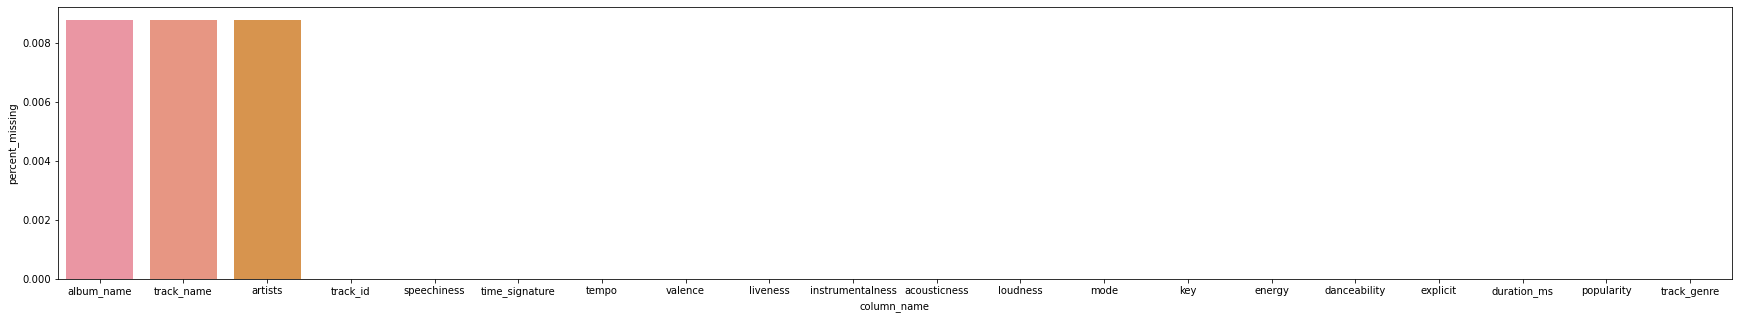

In [23]:
# Count for missing values
print("The following is a summary of missing values:")
print((df_subset.isna().sum().sort_values(ascending=False)))

# Calculate the percentage of missing values for each column
perc_missing = df_subset.isnull().sum() * 100 / len(df_subset)
df_subset_missing_values = pd.DataFrame({'column_name': df_subset.columns,
                                 'percent_missing': perc_missing})
df_subset_missing_values.sort_values('percent_missing', inplace=True, ascending=False)

# Construct a plot to display the percentages of missing values
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(
    x='column_name',
    y='percent_missing',
    data=df_subset_missing_values,
    ax=ax
)
plt.xlabel('column_name')
plt.ylabel('percent_missing')
plt.show()

<p>The analysis of missing values show that three features each have one record where there is no data entered.</p>
<p>The next line of code will attempt to identify these records.</p>

In [24]:
# Find rows with missing data
missing_data = df_subset[df_subset.isnull().any(axis=1)]

In [25]:
missing_data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


<p>The missing values for the three variables are all contained in one record. Therefore, this record will be removed from the dataset.</p>

In [26]:
# Remove rows containing missing data
df_subset = df_subset.dropna()

In [27]:
# Confirm the removal of missing data
# Return the new size of the dataset
df_subset.shape

(11399, 20)

<p>The new size of the dataset confirms that the row has been removed.</p>

#### Check for duplicates

In [28]:
df_subset[df_subset.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16900,0RPOy0HWyY3bLm40pm3T8s,Wolfgang Amadeus Mozart;Daniel Barenboim;Berli...,Mozart: Piano Concertos Nos. 20 & 22,"Mozart: Piano Concerto No. 20 in D Minor, K. 4...",24,417666,False,0.356,0.1590,2,-20.231,0,0.0379,0.984,0.943,0.1510,0.2290,71.779,4,classical
16910,1lOhnZV1VVicEMHDEsUXVQ,Wolfgang Amadeus Mozart;Erik Smith,Mozart - Inspiring Classics,"Minuet in F, K.1d",3,79360,False,0.478,0.1850,5,-16.501,1,0.0370,0.693,0.907,0.0665,0.9410,103.495,3,classical
16920,4GdCiwOXIpmQGUWl5XBqyr,Wolfgang Amadeus Mozart;Arthur Grumiaux;Walter...,Mozart - Inspiring Classics,6 Variations in G minor for Piano & Violin on ...,6,55613,False,0.308,0.0647,7,-24.599,0,0.0446,0.994,0.971,0.1780,0.7690,179.916,4,classical
16930,7wvPoDq2sE2qvRE1Trramr,Wolfgang Amadeus Mozart;New Philharmonia Orche...,Mozart: A Night of Classics,"Symphony No. 40 In G Minor, K.550: 1. Molto al...",9,85960,False,0.308,0.1280,7,-16.179,0,0.0368,0.929,0.956,0.1240,0.2940,103.577,4,classical
16940,1AypLOhAhLxEDCOy5XGxLM,Wolfgang Amadeus Mozart;Danielle Laval,Mozart - All Day Classics,"Nine Variations in D, K.573 on a minuet by J.P...",16,63893,False,0.457,0.0343,2,-27.041,0,0.0465,0.989,0.953,0.0988,0.4350,71.381,3,classical
26850,4CGNLY0PVsVGubWkee0lbO,Benny Martin;The Wong Janice,Lovely (Piano & Cello),Lovely - Piano & Cello,38,180931,False,0.307,0.1520,4,-16.993,0,0.0350,0.983,0.887,0.1480,0.1670,127.512,4,disney
30760,3jbAzLVcHiI5hYSkcKe1Ty,Martin Garrix;G-Eazy;Sasha Alex Sloan,Love Runs Out (feat. G-Eazy & Sasha Alex Sloan),Love Runs Out (feat. G-Eazy & Sasha Alex Sloan),63,164166,False,0.647,0.6420,9,-7.306,0,0.0743,0.262,0.000,0.1340,0.4800,90.045,4,edm
35570,4DAR1lX8D0pFUWmjrlnMro,Bonde do gato preto,São João do Gato Preto,Fogo Sem Fuzil,40,132075,False,0.710,0.7900,8,-2.452,1,0.0641,0.627,0.000,0.0784,0.9170,180.260,4,forro
39370,5At4JXNbsbGcmPoH67fULT,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"Secrets - From ""Gladiator"" Soundtrack",24,119293,False,0.166,0.0367,9,-31.020,1,0.0501,0.877,0.987,0.1010,0.0266,132.848,3,german
52570,7zBY3YjvcdkpbHIUx0fe5Q,Hank Williams,Hank Williams As Luke The Drifter (Expanded Ed...,Everything's Okay,12,172026,False,0.607,0.3780,7,-13.581,1,0.1480,0.837,0.000,0.0752,0.8700,73.728,4,honky-tonk


In [29]:
# Count the number of duplicates
len(df_subset[df_subset.duplicated()])

11

<p>The table above represents all the records that are duplicates. The size of this table indicates that there are a total of 11 duplicates. These duplicates do not serve any purpose, and therefore will be removed from the dataset.</p>

In [30]:
# Remove duplicates
df_subset = df_subset.drop_duplicates()

In [31]:
# Confirm the removal of duplicates
# Return the new size of the dataset
df_subset.shape

(11388, 20)

<p>The re-adjusted size of the dataset confirms the removal of the duplicates.</p>
<p>Because the removal of these duplicates may have impacted the count of tracks by genre, the values of tracks by genre will be calculated to discover which genres were affected the most.</p>

#### Recount genre values

In [32]:
df_subset.track_genre.value_counts().tail(10)

afrobeat      100
techno        100
edm            99
k-pop          99
german         99
honky-tonk     99
romance        99
disney         99
forro          99
classical      95
Name: track_genre, dtype: int64

<p>The above shows that only 8 out of the 114 genres were affected by the removal of these duplicates.</p>

#### Convert explicit feature

<p>To make it easier to use with the continuous features, the explicit feature will be converted from being a boolean data type to an integer type with a value of 1 meaning 'True' (has explicit content) and a value of 0 meaning 'False' (does not have explicit content).</p>

In [33]:
# Create a function for converting the explicit feature
def convert_explicit(row):
    
    if row.explicit == True:
        return 1
    else:
        return 0
    return row.explicit

In [34]:
# Convert the explicit feature
df_subset['explicit'] = df_subset.apply(lambda row: convert_explicit(row), axis=1)

<p>The data type for the explicit feature has been successfully converted.</p>

#### Convert duration_ms feature
<p>The duration feature will be converted from milliseconds to minutes.</p>

In [35]:
# Convert the duration feature from milliseconds to minutes
df_subset['duration_ms'] = df_subset['duration_ms']/60000

In [36]:
# Renaming the duration column
df_subset.rename(columns = {'duration_ms':'duration'}, inplace = True)

In [37]:
df_subset['duration']

0         3.844433
10        4.080000
20        4.049100
30        2.196000
40        5.113233
            ...   
113950    5.444200
113960    4.552467
113970    1.605033
113980    3.969100
113990    6.150817
Name: duration, Length: 11388, dtype: float64

## Feature Analysis

<p>The distribution of features will be analyzed to determine what impact they may have when it comes to the customization of playlists.</p>

### Distributions

#### Explicit content/lyrics distribution

<p>The frequency of songs containing explicit content and/or lyrics will be analyzed.</p>

<AxesSubplot:xlabel='explicit', ylabel='count'>

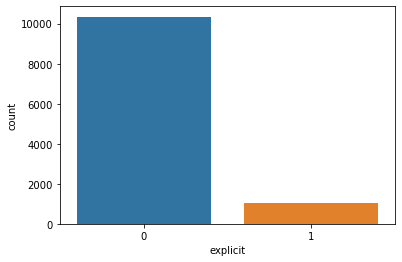

In [38]:
# Count songs that contain explicit lyrics/content
# 0 - No
# 1 - Yes
sns.countplot(x = 'explicit', data = df_subset)

<p>The plot above shows that there is a far higher frquency of songs in the dataset that contain explicit lyrics or contennt that those that do not contain explicit lyrics or content, meaning that the presence of explicit material most likely will not impact the creation of playlists.</p>

#### Popularity distrbution

<p>The popularity feature is a rating that measures how often songs are streamed by Spotify users.</p>

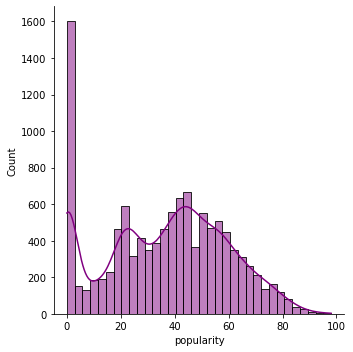

In [39]:
# Plot the distribution of songs by popularity
sns.displot(data = df_subset, x='popularity', color='purple', kde=True)

<p>Even though the distribution shows a high number of songs with a rating of 0 (i.e., songs that are not being streamed at all), that does not make up the majority of songs in the dataset. Most of them are receiving anywhere from a decent to a good number of streams. Nevertheless, this feature may still have an impact on what songs are added to a playlist.</p>

#### Distribution of songs by key and mode (minor and major)
<p>The key of the song refers to the scale that the song is played in, and the mode indicates whether the scale is minor or major (0 for minor, 1 for major). The plots below will display the distribution of songs by key and mode.</p>

<AxesSubplot:xlabel='mode', ylabel='count'>

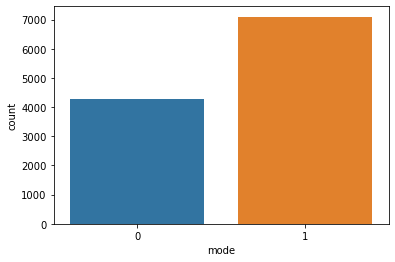

In [40]:
# Plot the distribution of the mode feature
# 0 - Minor
# 1 - Major
sns.countplot(data = df_subset, x = 'mode')

<p>The plot above shows that the majority of the songs are performed using a major scale. However, there are still a good number of songs that are performed using a minor scale, which may impact how playlists are customized.</p>

<AxesSubplot:xlabel='key', ylabel='count'>

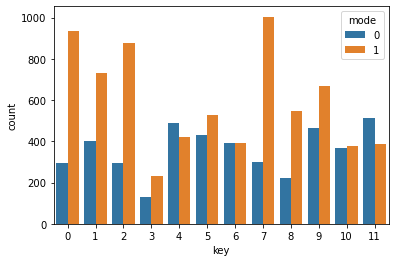

In [41]:
# Plot distribution of the key feature distinguished by mode
# 0 - Minor
# 1 - Major
sns.countplot(data = df_subset, x = 'key', hue = 'mode')

<p>This relationship shows that for many of the songs played in a given key, the major scale is used. However, the difference between usage of the minor and major scales for some keys are large, while for others they are close. In the case of keys 4 and 11 (the notes E and B, respectively), the minor scale is used.</p>

### Distribution of Musical Features
<p>The following visualizations will display how the values for the musical features of the songs are distributed, as well as the duration.</p>

In [42]:
# Continuous features
cont_data = ['duration',
        'danceability',
        'energy',
        'loudness',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo']

# Create a dataframe for the continuous features
df_cont = df_subset[cont_data]

# Show the new dataframe
df_cont

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3.844433,0.676,0.461,-6.746,0.1430,0.032200,0.000001,0.3580,0.7150,87.917
10,4.080000,0.627,0.363,-8.127,0.0291,0.279000,0.000000,0.0928,0.3010,99.905
20,4.049100,0.703,0.444,-9.331,0.0417,0.559000,0.000000,0.0973,0.7120,150.960
30,2.196000,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.6640,145.363
40,5.113233,0.474,0.519,-5.291,0.0253,0.281000,0.000000,0.1070,0.3260,151.832
...,...,...,...,...,...,...,...,...,...,...
113950,5.444200,0.557,0.393,-8.304,0.0331,0.110000,0.000000,0.3800,0.2380,114.048
113960,4.552467,0.509,0.200,-13.489,0.0337,0.830000,0.000006,0.0631,0.1070,129.574
113970,1.605033,0.121,0.242,-17.980,0.0375,0.000878,0.813000,0.1200,0.0362,85.784
113980,3.969100,0.516,0.634,-4.850,0.0339,0.030000,0.000002,0.0813,0.0921,76.994


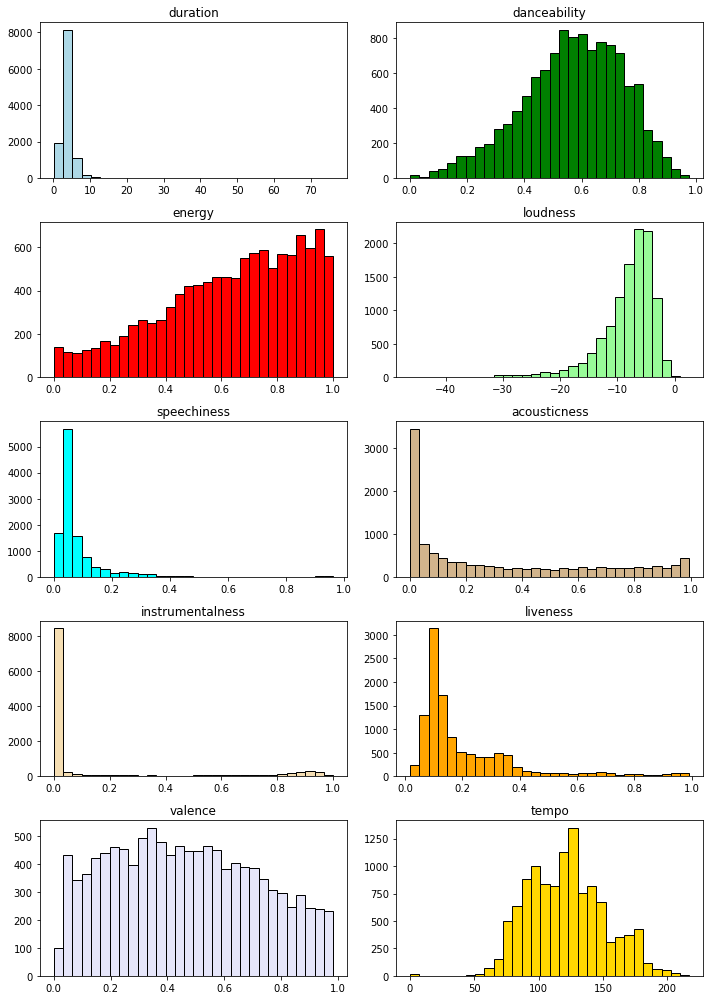

In [43]:
# Create a set of colors for each distribution plot
colors = ['lightblue','green','red','palegreen','cyan','tan','wheat','orange','lavender','gold']

# Create a series of subplots for the distribution of each continuous feature
plt.subplots(1, len(df_cont.columns), figsize=(10,14))

for i in range(0, len(df_cont.columns)):
    feature = cont_data[i]
    plt.subplot(5,2,i+1)
    plt.hist(x = df_cont[feature], bins = 30, color = colors[i], ec='black')
    plt.title(feature)

plt.tight_layout()

<p>Here are a few observations discovered from the above visualizations:
<ol>
    <li>The duration of the majority of songs in the playlist appear to be between 2.5 to 5 minutes in length.</li>
    <li>The dataset has a high number of songs that are energetic, loud, and danceable.</li>
    <li>The valence (emotional tone) of the songs are more or less the same.</li>
</ol>

<p>These observations could point out some commonalities that these playlists may share as well as differences.</p>

#### Genre Analysis
<p>To get a better understanding of the musical features for each genre, the mean value for each feature of that genre will be calculated.</p>

In [44]:
m_data = ['popularity',
        'duration',
        'danceability',
        'energy',
        'loudness',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo']

df_by_genre = df_subset.groupby("track_genre")[m_data].mean()
df_by_genre.reset_index(inplace = True)
df_by_genre.head(10)

,track_genre,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,acoustic,44.28,3.654149,0.545060,0.387846,-9.73139,0.042599,0.608500,0.013784,0.151468,0.405637,119.43215
1,afrobeat,27.60,3.996602,0.668860,0.680380,-7.82302,0.093423,0.300624,0.211578,0.202249,0.682940,116.75796
2,alt-rock,39.31,3.887650,0.509470,0.786390,-5.54084,0.056615,0.082536,0.049749,0.207447,0.476524,121.41405
3,alternative,29.23,3.686971,0.571290,0.692610,-6.64799,0.063397,0.177515,0.057733,0.167724,0.463315,122.13043
4,ambient,45.35,4.048121,0.379758,0.249416,-17.85296,0.041344,0.744836,0.616258,0.127042,0.180954,113.71216
5,anime,50.22,3.515543,0.538820,0.622312,-8.34185,0.081719,0.327013,0.281046,0.205813,0.390852,115.49837
6,black-metal,25.15,5.381313,0.294946,0.859230,-6.70055,0.096778,0.054303,0.439321,0.279234,0.173444,123.90512
7,bluegrass,29.12,3.676263,0.525130,0.497636,-10.55178,0.037049,0.536063,0.148000,0.203019,0.555075,123.15947
8,blues,35.78,3.614444,0.540940,0.529540,-8.67315,0.055872,0.444314,0.018954,0.196000,0.539225,113.31857
9,brazil,47.36,4.438614,0.566880,0.609830,-7.79134,0.106362,0.308495,0.029377,0.296953,0.466274,119.25856


<p>The above table provides a sample of each genre and their mean values for the selected features.</p>
<p>The following table will provide a summary for the genres by displaying the genres with the maximum and minimum values for each feature.</p>

In [45]:
# Create a new dataframe for storing the genres with the highest and lowest mean value for each feature
df_mm_genres = pd.DataFrame(columns=['feature','max_genre', 'max_value', 'min_genre', 'min_value'])

In [46]:
# For each feature,
#  get the index for the genre with the highest average value,
#  and the index for the genre with the lowest average value.
# This data will be presented as a summary in a new dataframe.
for m in m_data:
    mx = df_by_genre[m].max() # The maximum value for a given feature
    idx_01 = df_by_genre[m].idxmax() # Index of the row containing the max
    g1 = df_by_genre.iloc[idx_01]['track_genre'] # Genre of the max
    
    mn = df_by_genre[m].min() # The minimum value for a given feature
    idx_02 = df_by_genre[m].idxmin() # Index of the row containing the min
    g2 = df_by_genre.iloc[idx_02]['track_genre'] # Genre of the min
    feat = m # The given feature
    
    # Add to the dataframe
    df_mm_genres.loc[len(df_mm_genres.index)] = [feat, g1, mx, g2, mn]

In [47]:
display(df_mm_genres)

,feature,max_genre,max_value,min_genre,min_value
0,popularity,pop-film,60.550000,iranian,3.000000
1,duration,minimal-techno,6.919705,children,2.257554
2,danceability,kids,0.778760,sleep,0.165992
3,energy,grindcore,0.938560,classical,0.194387
4,loudness,j-idol,-3.889520,sleep,-24.482120
5,speechiness,comedy,0.732480,bluegrass,0.037049
6,acousticness,classical,0.921854,death-metal,0.004890
7,instrumentalness,study,0.798864,sertanejo,0.000014
8,liveness,comedy,0.659927,minimal-techno,0.124364
9,valence,salsa,0.798340,sleep,0.048394


<p>This summary provides a breakdown of selected features and the genres that contain the highest and lowest mean values for these features. The summary can provide a better understanding of the music of every genre as well as the songs that may be included in a playlist.</p>

<p>An example of this would be a playlist with extremely low values for danceability, loudness, valence, and tempo. The sleep genre has the lowest mean value for each of these genres, so this playlist may contain songs that were meant to be listened to as a way to relax before bedtime.</p>

### Detecting Outliers

<p>The dataset needs to be checked for outliers that may have an impact on playlist creation. How they are handled will depend on their frequency. If there are a small amount of outliers, they may be removed. Otherwise, they may be preserved since they could be the result of variation and not a data error.</p>

#### Box-and-whisker

In [48]:
# Extract all continuous features from the dataset.
# Countable features will also be included (explicit, key, mode, popularity, and time_signature)
# Non-linear features are excluded (artists, track_id, track_name, album_name, and track_genre)
data = ['popularity',
        'duration',
        'explicit',
        'danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'time_signature']

# Construct a new dataframe to include only these features
df_new = df_subset[data]

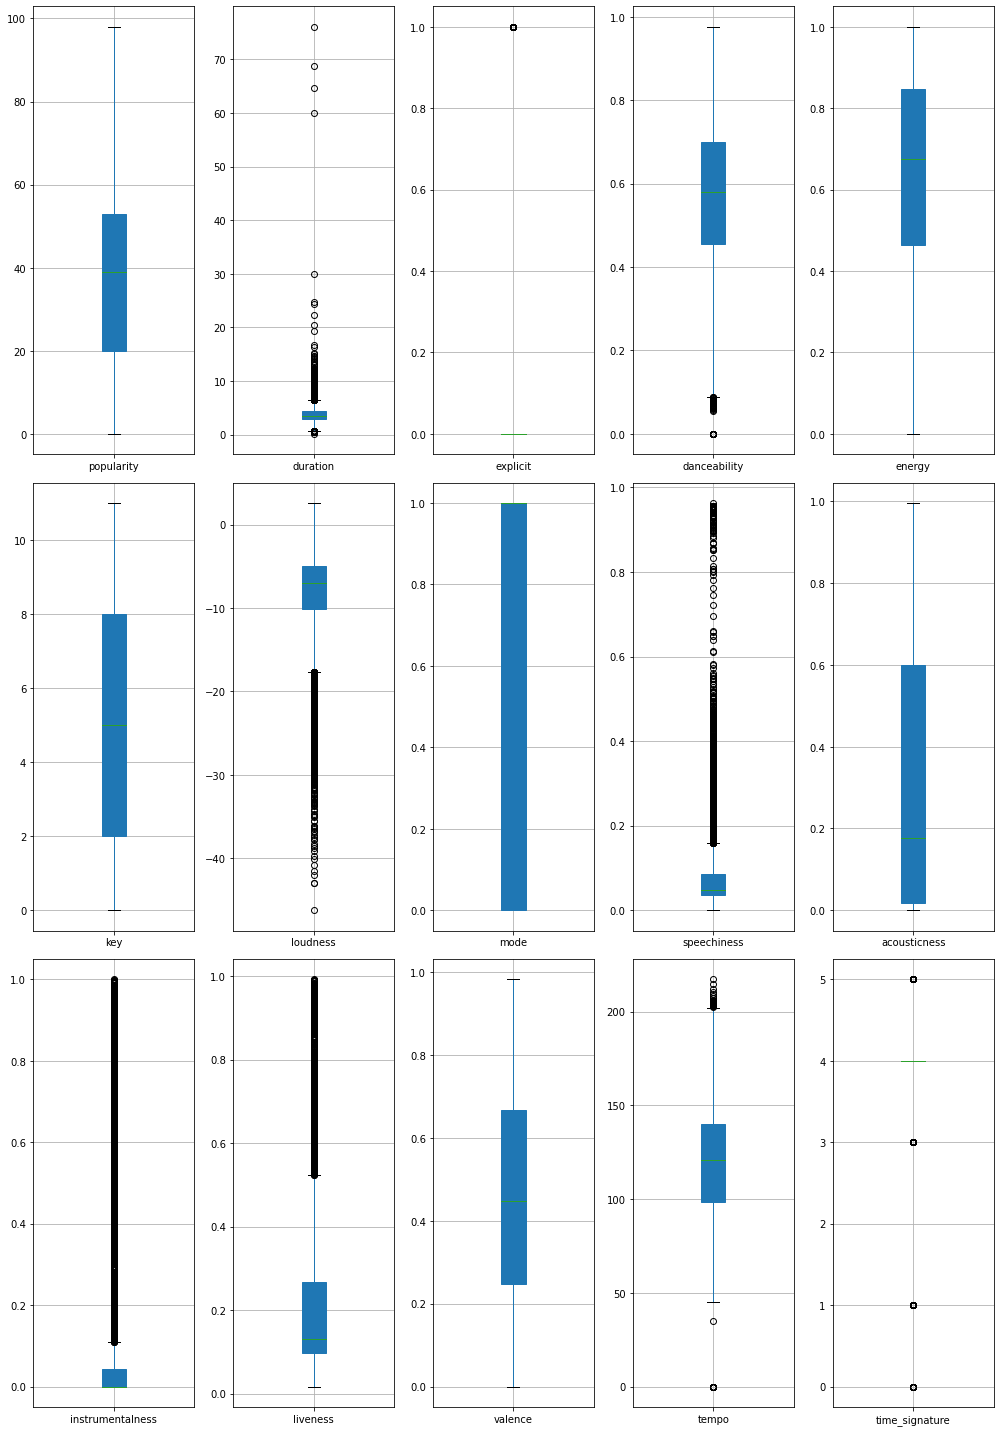

In [49]:
# Create box-and-whisker plots for the features of the new dataframe
plt.subplots(1, len(df_new.columns), figsize=(14,20))

for i in range(0, len(df_new.columns)):
    plt.subplot(3,5,i+1)
    df_new.boxplot(column=data[i], patch_artist=True)

plt.tight_layout()

#### Counting outliers

In [50]:
# Calculate the z-score for all tracks in the new dataframe
z = np.abs(stats.zscore(df_new))
print(z)

[[1.61165123 0.01589638 0.31735666 ... 0.97655898 1.11672039 0.22408573]
 [1.65566755 0.1381045  0.31735666 ... 0.63210885 0.71556141 0.22408573]
 [1.69968387 0.12207409 0.31735666 ... 0.96490196 0.99291139 0.22408573]
 ...
 [0.67719732 1.14586759 0.31735666 ... 1.66103455 1.18809777 0.22408573]
 [0.20312905 0.0805714  0.31735666 ... 1.44382553 1.48224087 0.22408573]
 [0.633181   1.21241021 0.31735666 ... 0.62822318 0.31045374 2.05032451]]


In [51]:
# Set threshold for outlier detection
threshold = 3

# Build a list containing the outliers
z_out = z[z > threshold]

# Count the number of outliers
len(z_out)

2094

<p>Using the threshold value, 2094 outliers have been detected. However, as stated earlier and considering the context of Spotify's extensive library, these outliers can be regarded as examples of natural variations in the music as opposed to erroneous data entry. Therefore, these outliers will be preserved.</p>

### Feature Relationships

<p>Relationships among the features will be analyzed using a correlation matrix to measure their independence.</p>

#### Correlation Matrix

In [52]:
# Display Correlation Matrix
df_corr = df_new.corr().round(3)
df_corr.style.background_gradient(cmap='coolwarm')

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.014000,0.067000,0.057000,-0.005000,-0.011000,0.066000,-0.033000,-0.044000,-0.042000,-0.113000,-0.039000,-0.029000,0.010000,0.026000
duration,-0.014000,1.000000,-0.075000,-0.091000,0.050000,0.012000,-0.027000,-0.038000,-0.061000,-0.076000,0.129000,0.006000,-0.165000,0.028000,0.020000
explicit,0.067000,-0.075000,1.000000,0.129000,0.095000,0.003000,0.109000,-0.037000,0.302000,-0.105000,-0.111000,0.038000,-0.007000,-0.010000,0.039000
danceability,0.057000,-0.091000,0.129000,1.000000,0.146000,0.057000,0.261000,-0.067000,0.108000,-0.181000,-0.199000,-0.135000,0.481000,-0.046000,0.227000
energy,-0.005000,0.050000,0.095000,0.146000,1.000000,0.041000,0.765000,-0.076000,0.153000,-0.733000,-0.190000,0.188000,0.263000,0.244000,0.191000
key,-0.011000,0.012000,0.003000,0.057000,0.041000,1.000000,0.037000,-0.123000,0.034000,-0.044000,-0.019000,-0.004000,0.050000,-0.003000,0.011000
loudness,0.066000,-0.027000,0.109000,0.261000,0.765000,0.037000,1.000000,-0.047000,0.066000,-0.592000,-0.440000,0.093000,0.288000,0.210000,0.211000
mode,-0.033000,-0.038000,-0.037000,-0.067000,-0.076000,-0.123000,-0.047000,1.000000,-0.037000,0.102000,-0.029000,0.019000,0.026000,-0.004000,-0.035000
speechiness,-0.044000,-0.061000,0.302000,0.108000,0.153000,0.034000,0.066000,-0.037000,1.000000,-0.011000,-0.089000,0.212000,0.031000,0.006000,0.024000
acousticness,-0.042000,-0.076000,-0.105000,-0.181000,-0.733000,-0.044000,-0.592000,0.102000,-0.011000,1.000000,0.119000,-0.018000,-0.114000,-0.207000,-0.175000


<p>From the correlation matrix, there are three relationships that stand out: energy-loudness (strong positive relationship), acousticness-loudness (strong negative relationship), and acousticness-loudness (strong negative relationship).</p>
<p>Each of these relationships will be visualized using a scatterplot.</p>

#### Energy-Loudness Relationship

<AxesSubplot:xlabel='energy', ylabel='loudness'>

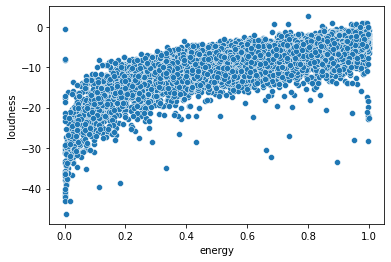

In [53]:
sns.scatterplot(data = df_new, x = 'energy', y = 'loudness')

<p>The scatterplot shows that there is a clear positive relationship between the energy and loudness features of a song. This makes sense since songs that are high in energy have a sound that is louder than others.</p>

#### Acousticness-Energy Relationship

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

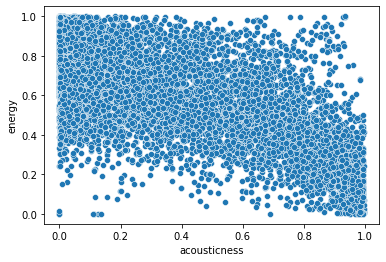

In [54]:
sns.scatterplot(data = df_new, x = 'acousticness', y = 'energy')

<p>The scatterplot above slows a downward trend for the energy feature for songs that are more acoustic. In other words, songs that feature more acoustics tend to be lower in energy.</p>

#### Acousticness-Loudness Relationship

<AxesSubplot:xlabel='acousticness', ylabel='loudness'>

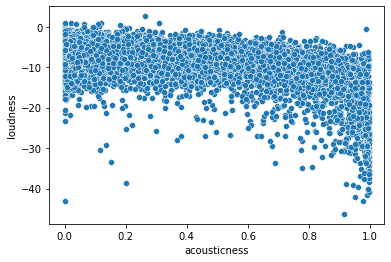

In [55]:
sns.scatterplot(data = df_new, x = 'acousticness', y = 'loudness')

<p>The scatterplot above shows a clear negative relationship between acousticness and loudness, suggesting songs that have a lot of acoustics tend to be lower in loudness. This relationship may also be the result of the strong positive correlation between the energy and loudness features.</p>

## Experimentation

<p>Machine learning models will be used to cluster songs based on their feature values. These clusters will be analyzed to determine what features have the most influence when it comes to what songs are assigned to a cluster. Prior to fitting the data to these models, features will be manually chosen, their values will be standardized, and the dimensionality of the dataset will be reduced.</p>

### Feature Selection
<p>The following features have been manually selected to be analyzed for dimensionality reduction:
    <ul>
        <li>popularity</li>
        <li>duration</li>
        <li>explicit</li>
        <li>acousticness</li>
        <li>danceability</li>
        <li>energy</li>
        <li>instrumentalness</li>
        <li>key</li>
        <li>liveness</li>
        <li>loudness</li>
        <li>mode</li>
        <li>tempo</li>
        <li>time_signature</li>
        <li>valence</li>
    </ul>
</p>

In [56]:
features = ['popularity',
           'duration',
           'explicit',
           'acousticness',
           'danceability',
           'energy',
           'instrumentalness',
           'key',
           'liveness',
           'loudness',
           'mode',
           'tempo',
           'time_signature',
           'valence']

# Create a dataframe to include all the features for our models
df_features = df_new[features]
df_features.head(5)

,popularity,duration,explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,time_signature,valence
0,73,3.844433,0,0.0322,0.676,0.461,0.000001,1,0.3580,-6.746,0,87.917,4,0.715
10,74,4.080000,0,0.2790,0.627,0.363,0.000000,8,0.0928,-8.127,1,99.905,4,0.301
20,75,4.049100,0,0.5590,0.703,0.444,0.000000,11,0.0973,-9.331,1,150.960,4,0.712
30,0,2.196000,0,0.7880,0.620,0.309,0.000000,5,0.1460,-9.209,1,145.363,4,0.664
40,0,5.113233,0,0.2810,0.474,0.519,0.000000,7,0.1070,-5.291,1,151.832,4,0.326


### Dimensionality Reduction
<p>The number of features from the dataset will be reduced to improve the performance of the model while retaining as much important information as possible.</p>
<p>The two techniques that will be applied are <b>t-distributed Stochastic Neighbor Embedding (t-SNE)</b> and <b>Principal Component Analysis (PCA).</b></p>

#### Standardizing the data

<p>To perform dimensionality reduction, the values of the dataset features will need to be standardized.</p>

In [57]:
# Standardize the data
std_features = StandardScaler().fit_transform(df_features)

In [58]:
# Create a dataframe for the standardized values
df_features_std = pd.DataFrame(std_features)
df_features_std.columns = features

In [59]:
# Display the new dataframe with the standardized values
df_features_std.head(10)

,popularity,duration,explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,time_signature,valence
0,1.611651,0.015896,-0.317357,-0.856566,0.621469,-0.690781,-0.499380,-1.217907,0.789585,0.300778,-1.286051,-1.116720,0.224086,0.976559
1,1.655668,0.138105,-0.317357,-0.112938,0.340344,-1.080862,-0.499384,0.760547,-0.627783,0.029528,0.777574,-0.715561,0.224086,-0.632109
2,1.699684,0.122074,-0.317357,0.730725,0.776374,-0.758448,-0.499384,1.608456,-0.603732,-0.206958,0.777574,0.992911,0.224086,0.964902
3,-1.601540,-0.839284,-0.317357,1.420720,0.300183,-1.295805,-0.499384,-0.087362,-0.343454,-0.182995,0.777574,0.805617,0.224086,0.778390
4,-1.601540,0.674129,-0.317357,-0.106912,-0.537455,-0.459916,-0.499384,0.477911,-0.551890,0.586564,0.777574,1.022091,0.224086,-0.534967
5,0.423211,-0.136003,-0.317357,1.788316,0.162489,-1.729672,-0.498789,-1.500544,-0.651298,-0.421641,-1.286051,-0.448256,0.224086,-0.604909
6,1.699684,0.221110,-0.317357,1.661767,-1.105442,-0.706702,-0.452262,-0.652635,-0.102950,0.247353,0.777574,1.791983,-2.050325,-0.189142
7,0.819358,-0.080822,-0.317357,-0.687834,-0.480082,-0.244973,-0.499380,-0.087362,-0.322076,0.411361,0.777574,0.625015,-2.050325,-0.457254
8,-1.601540,0.054866,-0.317357,0.417364,-0.669411,0.260541,-0.491812,1.325819,1.040778,0.330044,-1.286051,0.962627,0.224086,-0.363998
9,-1.601540,-0.643184,-0.317357,1.673819,-0.434184,-1.948595,-0.499352,-0.935271,-0.551890,-1.223019,-1.286051,-1.044406,0.224086,-0.954620


#### t-SNE
<p>With the values standardized, they can be passed to the dimensionality reduction models. The first is t-SNE.</p>
<p>To find the optimal parameters, different values for the number of iterations and perplexity were used. After experimentation with the parameters, the optimal values for each were chosen.</p>
<p>For perplexity, the optimal value was chosen using the formula N^(1/2), where N is the number of observations (or songs) in the dataset.</p>

In [60]:
# Get the number of rows (observations)
N = len(df_features)

# Optimal perplexity
plex = int(round(N**(1/2),0))
print("Optimal perplexity: " + str(plex))

Optimal perplexity: 107


In [61]:
# Initialize t-SNE
tsne_model = TSNE(perplexity = plex, n_iter = 5000, random_state = 0) # random_state value ensures reproducibility

In [62]:
# Get the t-SNE results
tsne_features = tsne_model.fit_transform(df_features_std)

In [63]:
# Build a dataframe for the t-SNE results
df_tsne = pd.DataFrame(tsne_features, columns = ['tsne0', 'tsne1'])

In [64]:
# Display a sample of the t-SNE dataframe
df_tsne.head(10)

,tsne0,tsne1
0,-34.505878,50.857941
1,36.920753,-25.220913
2,44.099716,-28.845877
3,56.677582,-28.567583
4,35.079094,-4.649602
5,-11.293031,55.218884
6,47.704796,16.523581
7,44.615692,13.229575
8,-49.633839,29.868427
9,-9.951530,62.010448


<AxesSubplot:xlabel='tsne0', ylabel='tsne1'>

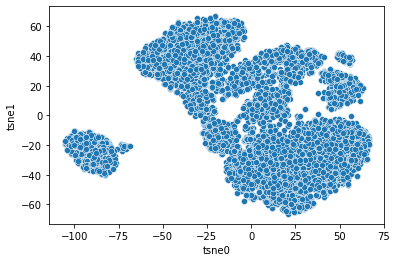

In [65]:
# Plot the resulting clusters
sns.scatterplot(data = df_tsne, x = 'tsne0', y='tsne1')

<p>The optimal parameters for the t-SNE model produced the best result for the clustering of the data points. From the diagram above, only one cluster appears to be dissimilar to all the others.</p>

#### PCA
<p>The PCA technique will reduce the dataset to 9 components and the variance of each component will be examined to determine the important features.</p>

In [66]:
# Initialize PCA
pca_model = PCA(n_components = 9, random_state=0)

In [67]:
# Get the PCA results
pca_features = pca_model.fit_transform(df_features_std)

In [68]:
# Build a dataframe for the PCA features
df_pca = pd.DataFrame(pca_features, columns = ['pca_01', 
                                               'pca_02', 
                                               'pca_03', 
                                               'pca_04', 
                                               'pca_05', 
                                               'pca_06', 
                                               'pca_07', 
                                               'pca_08',
                                              'pca_09'])

In [69]:
# Display the PCA dataset
df_pca.head(10)

,pca_01,pca_02,pca_03,pca_04,pca_05,pca_06,pca_07,pca_08,pca_09
0,-0.739385,-0.897331,0.169598,-1.052147,-0.448747,0.296859,1.492175,0.783812,-1.783581
1,0.499091,-0.776413,0.500388,-0.805598,-0.888317,-0.741513,1.187887,0.139868,1.008241
2,-0.102687,-1.490135,0.642210,-0.004335,-0.494898,-1.939894,0.861301,-0.973078,1.269006
3,0.854306,-1.600146,-0.821728,1.610669,0.349477,-0.235188,-0.865476,-0.899139,0.120535
4,0.014057,0.781727,-0.188110,1.351699,0.103386,-0.221041,-0.509571,-0.494481,1.066660
5,1.882261,-1.242420,0.360426,-0.481511,-0.941235,0.074554,0.399688,-0.013909,-1.722273
6,1.310802,0.330802,-1.629781,-0.657246,-1.288697,-2.508250,0.123962,0.128102,0.213351
7,0.126464,0.630923,-0.981850,-0.520527,-0.585531,-1.614747,-0.333944,1.311853,0.691490
8,-0.277467,1.014245,0.199901,0.399403,2.142238,-0.492167,-0.316917,-1.167754,-0.443745
9,2.753517,-1.079126,0.233151,0.214316,0.520230,0.806471,-0.495616,-0.085603,-1.510276


In [70]:
# Creating a table with the explained variance ratio
pca_comps = [f"PCA {i}" for i in range(1, 10, 1)]
scree = pd.DataFrame(list(zip(pca_comps, pca_model.explained_variance_ratio_)), columns=["Component", "EV Ratio"])

In [71]:
# Calculate the cumulative explained variance ratio
cumul_var = []
cumul_var.append(scree['EV Ratio'][0])

for i in range(0, len(scree) - 1):
    c_var = cumul_var[i] + scree['EV Ratio'][i+1]
    cumul_var.append(c_var)

In [72]:
# Update the EVR Table to include the Cumulative Explained Variance Ratio
scree_01 = pd.DataFrame(list(zip(pca_comps, pca_model.explained_variance_ratio_, cumul_var)), columns=["Component", "EV Ratio", "Cumulative EV"])
scree_01

,Component,EV Ratio,Cumulative EV
0,PCA 1,0.215281,0.215281
1,PCA 2,0.109713,0.324994
2,PCA 3,0.085992,0.410986
3,PCA 4,0.079488,0.490474
4,PCA 5,0.076322,0.566797
5,PCA 6,0.069286,0.636083
6,PCA 7,0.066746,0.702828
7,PCA 8,0.061629,0.764457
8,PCA 9,0.061305,0.825762


<p>The decided threshold for variability will be 80%. According to the table above, the cumulative Explained Variance Ratio reaches above 80% with the 9th Principal Component. This is further explained by the graph below.</p>

[Text(0.5, 1.0, 'Proportion of Variance')]

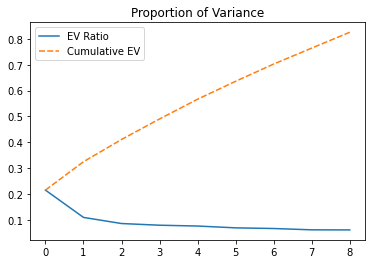

In [73]:
# Plot the explained variance ratio for all the components
sns.lineplot(data = scree_01[['EV Ratio', 'Cumulative EV']]).set(title = "Proportion of Variance")

<p>To learn what variables explain the variance of the data, the first two Principal Components will be examined.</p>

In [74]:
# Sorting the values of the first principal component by how large each one is
df2 = pd.DataFrame({'PCA':pca_model.components_[0], 'Variable Names':list(df_features.columns)})
df2 = df2.sort_values('PCA', ascending = False)

# Sorting the absolute values of the first principal component by magnitude
df3 = pd.DataFrame(df2)
df3['PCA'] = df3['PCA'].apply(np.absolute)
df3 = df3.sort_values('PCA', ascending = False)

df2.head()

,PCA,Variable Names
3,0.426286,acousticness
6,0.280953,instrumentalness
10,0.061376,mode
1,0.031048,duration
7,0.049760,key


<p>According to the first Principal Component, the acousticness feature has the highest importance with a PCA score of approximately 42.6%. Intuitively, this would suggest that Spotify would first examine a song's acousticness to determine what playlist it belongs to.</p>

In [75]:
# Sorting the values of the second principal component by how large each one is
df4 = pd.DataFrame({'PCA':pca_model.components_[1], 'Variable Names':list(df_features.columns)})
df4 = df4.sort_values('PCA', ascending = False)

# Sorting the absolute values of the second principal component by magnitude
df5 = pd.DataFrame(df4)
df5['PCA'] = df5['PCA'].apply(np.absolute)
df5 = df5.sort_values('PCA', ascending = False)

df4.head()

,PCA,Variable Names
1,0.389018,duration
5,0.296311,energy
6,0.293699,instrumentalness
11,0.250797,tempo
8,0.198552,liveness


<p>For the second component, the song's duration was considered the most important feature in terms of variance, with a PCA score of 38.9%. This would suggest that Spotify considered the length of the song the next determinant when grouping songs in playlists, which is interesting since duration is a non-musical feature.</p>

### Model Application
<p>The four algorithms that will be used to cluster the songs are K-Means, K-Means++, Mini-Batch K-Means, and Mini-Batch K-Means++. Each of these algorithms will fit the data from three standardized datasets: the original dataset, the t-SNE dataset, and the PCA dataset. Their performance will then be evaluated using the Sihouette score and Davies-Bouldin Index metrics.</p>

#### The datasets
<p>The three datasets will be stored in simple variables for accessibility purposes.</p>

In [76]:
# Store the three datasets in new variables
X1 = df_features_std
X2 = df_tsne
X3 = df_pca

#### Silhouette Scores
<p>The silhouette score metric will be used to evaluate the performance of each model. Each model will fit each dataset using a list of k values. The silhouette score will be measured for each fit, and the average silhouette score for all the fits will be calculated.</p>

#### Range of k values for clustering

In [77]:
# Create a range of cluster values
range_k_values = [2,3,4,5,6,7,8]

#### Storing the silhouette scores

In [78]:
# Each model will have a list for the silhouette scores using each dataset.

# K-Means
k_means_silhouette = []
k_means_silhouette_tsne = []
k_means_silhouette_pca = []

# K-Means plus
k_means_plus_silhouette = []
k_means_plus_silhouette_tsne = []
k_means_plus_silhouette_pca = []

# Mini-Batch K-Means
mini_k_means_silhouette = []
mini_k_means_silhouette_tsne = []
mini_k_means_silhouette_pca = []

# Mini-Batch K-Means++
mini_k_means_plus_silhouette = []
mini_k_means_plus_silhouette_tsne = []
mini_k_means_plus_silhouette_pca = []

#### Initialization of all the clustering models

In [79]:
# Initialize the models
k_means = KMeans(init='random', n_init = 'auto', random_state = 0) # K-Means
k_means_plus = KMeans(init='k-means++', n_init = 'auto', random_state = 0) # K-Means++
mini_k_means = MiniBatchKMeans(init='random', n_init = 'auto', batch_size = 1500, random_state = 0) # Mini Batch K-Means
mini_k_means_plus = MiniBatchKMeans(init='k-means++', n_init = 'auto', batch_size = 1500, random_state = 0) # Mini Batch K-Means++

#### The get_silhouette_scores() function
<p>The get_silhouette_scores() function will be used to calculate the silhouette scores for each fit, then return a list of silhouette scores that will be used to calculate the average.</p>

In [80]:
# Build a function that will perform the following:
# - fit the data to k clusters
# - calculate the silhouette score

# model - The Clustering Algorithm
# X - the dataset
# k_clusters - range of k values
# silhouette_scores - list of silhouette_scores for each value of k
def get_silhouette_scores(model, X, k_clusters, silhouette_scores):
    
    silhouette_scores = [] # empty list
    for k in k_clusters:
        model.n_clusters = k
        model_labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, model_labels)
        
        '''
        print("For k clusters = ",
              str(k),
             ", the average silhouette score is ",
              str(silhouette_avg),
             )
        '''
        # Append the silhouette score to the list of scores
        silhouette_scores.append(silhouette_avg)
        
    return silhouette_scores

#### Run the get_silhouette_scores() function

In [81]:
# Run the get_silhouette_scores function for each algorithm and dataset

# K-Means
k_means_scores = get_silhouette_scores(k_means, X1, range_k_values, 
                                       k_means_silhouette)
k_means_scores_tsne = get_silhouette_scores(k_means, X2, range_k_values,
                                            k_means_silhouette_tsne)
k_means_scores_pca = get_silhouette_scores(k_means, X3, range_k_values, 
                                           k_means_silhouette_pca)

# K-Means++
k_means_plus_scores = get_silhouette_scores(k_means_plus, X1, 
                                            range_k_values, k_means_plus_silhouette)
k_means_plus_scores_tsne = get_silhouette_scores(k_means_plus, X2,
                                                 range_k_values, k_means_plus_silhouette_tsne)
k_means_plus_scores_pca = get_silhouette_scores(k_means_plus, X3, 
                                                range_k_values, k_means_plus_silhouette_pca)

# Mini-Batch K-Means
mini_k_means_scores = get_silhouette_scores(mini_k_means, X1, range_k_values, 
                                                  mini_k_means_silhouette)
mini_k_means_scores_tsne = get_silhouette_scores(mini_k_means, X2, range_k_values, 
                                                  mini_k_means_silhouette_tsne)
mini_k_means_scores_pca = get_silhouette_scores(mini_k_means, X3, range_k_values, 
                                                  mini_k_means_silhouette_pca)

# Mini-Batch K-Means++
mini_k_means_plus_scores = get_silhouette_scores(mini_k_means_plus, X1, range_k_values, 
                                                  mini_k_means_plus_silhouette)
mini_k_means_plus_scores_tsne = get_silhouette_scores(mini_k_means_plus, X2, range_k_values, 
                                                  mini_k_means_plus_silhouette_tsne)
mini_k_means_plus_scores_pca = get_silhouette_scores(mini_k_means_plus, X3, range_k_values, 
                                                  mini_k_means_plus_silhouette_pca)

#### Calculating the average silhouette score

In [82]:
# Calculate the average silhouette score for each model's performance using each dataset

# K-Means
mean_k_means_scores = statistics.mean(k_means_scores)
mean_k_means_scores_tsne = statistics.mean(k_means_scores_tsne)
mean_k_means_scores_pca = statistics.mean(k_means_scores_pca)

# K-Means++
mean_k_means_plus_scores = statistics.mean(k_means_plus_scores)
mean_k_means_plus_scores_tsne = statistics.mean(k_means_plus_scores_tsne)
mean_k_means_plus_scores_pca = statistics.mean(k_means_plus_scores_pca)

# Mini-Batch K-Means
mean_mini_k_means_scores = statistics.mean(mini_k_means_scores)
mean_mini_k_means_scores_tsne = statistics.mean(mini_k_means_scores_tsne)
mean_mini_k_means_scores_pca = statistics.mean(mini_k_means_scores_pca)

# Mini-Batch K-Means++
mean_mini_k_means_plus_scores = statistics.mean(mini_k_means_plus_scores)
mean_mini_k_means_plus_scores_tsne = statistics.mean(mini_k_means_plus_scores_tsne)
mean_mini_k_means_plus_scores_pca = statistics.mean(mini_k_means_plus_scores_pca)

#### Plotting the Silhouette Scores
<p>The performance of each model for each dataset will be visualized in the following graph.</p>

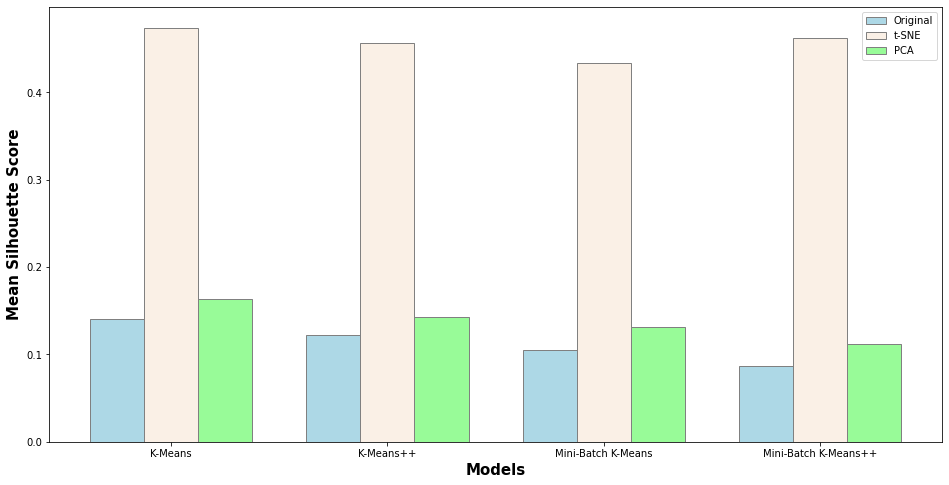

In [83]:
# Construct a plot to display the mean silhouette scores for each algorithm and dataset

# Set the width of the bar
barWidth = 0.25
fig = plt.subplots(figsize =(16, 8)) 

# The height of the bars will represent the mean silhouette scores.

# Original
original = [mean_k_means_scores,
            mean_k_means_plus_scores,
            mean_mini_k_means_scores,
            mean_mini_k_means_plus_scores] 

# t-SNE
tsne = [mean_k_means_scores_tsne,
        mean_k_means_plus_scores_tsne,
        mean_mini_k_means_scores_tsne,
        mean_mini_k_means_plus_scores_tsne]

# PCA
pca = [mean_k_means_scores_pca,
       mean_k_means_plus_scores_pca,
       mean_mini_k_means_scores_pca,
       mean_mini_k_means_plus_scores_pca] 

# Set position of bar on X axis 
br1 = np.arange(len(original)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot

# Original dataset
plt.bar(br1, original, color ='lightblue', width = barWidth, 
        edgecolor ='grey', label ='Original') 

# t-SNE dataset
plt.bar(br2, tsne, color ='linen', width = barWidth, 
        edgecolor ='grey', label ='t-SNE')

# PCA dataset
plt.bar(br3, pca, color ='palegreen', width = barWidth, 
        edgecolor ='grey', label ='PCA') 

# Adding Xticks 
plt.xlabel('Models', fontweight ='bold', fontsize = 15) 
plt.ylabel('Mean Silhouette Score', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(original))], 
           ['K-Means', 'K-Means++', 'Mini-Batch K-Means', 'Mini-Batch K-Means++'])

plt.legend(loc = 'upper right')
plt.show() 

<p>Based on the above graph, each of the clustering algorithms performed the best with the t-SNE dataset. Overall, the K-Means algorithm had the best performance as its average silhouette score for all the datasets was higher than the others.</p>

#### Silhouette Scores: t-SNE dataset
<p>The table below provides the average silhouette score for each algorithm when fitted with the t-SNE dataset.</p>

In [84]:
# Set up the columns and row data
d1 = {'Model': ['K-Means','K-Means++','Mini-Batch K-Means', 'Mini-Batch K-Means++'],
         'Dataset': ['t-SNE','t-SNE','t-SNE','t-SNE'],
         'Mean Silhouette Score': [mean_k_means_scores_tsne,
                                  mean_k_means_plus_scores_tsne,
                                  mean_mini_k_means_scores_tsne,
                                  mean_mini_k_means_plus_scores_tsne]}

# Create the dataframe for the t-SNE dataset
df_tsne_scores = pd.DataFrame(d1)
df_tsne_scores

,Model,Dataset,Mean Silhouette Score
0,K-Means,t-SNE,0.474098
1,K-Means++,t-SNE,0.456901
2,Mini-Batch K-Means,t-SNE,0.433287
3,Mini-Batch K-Means++,t-SNE,0.462376


<p>Just like the graph, the table shows that the K-Means algorithm had the best performance.</p>

#### Davies-Bouldin Index for the t-SNE dataset
<p>The Davies-Bouldin Index metric will be used to measure the distance between the clusters formed by each algorithm.</p>

In [85]:
# Create lists to store the DBI scores for each algorithm
k_means_dbi_scores = []
k_means_plus_dbi_scores = []
mini_k_means_dbi_scores = []
mini_k_means_plus_dbi_scores = []

#### The get_DBI() function
<p>The get_DBI() function will be used to calculate the DBI score for each fit of each model using a given dataset. In this case, the t-SNE dataset will be used since it provided the best silhouette scores for every model.</p>

In [86]:
# Build a function for calculating the DBI for each cluster
def get_DBI(model, X, k_clusters, dbi_scores):
    
    dbi_scores = [] # empty list
    for k in k_clusters:
        model.n_clusters = k
        model_labels = model.fit_predict(X)
        db_index = davies_bouldin_score(X, model_labels)
        
        # Append the dbi score to the list of scores
        dbi_scores.append(db_index)
        
    return dbi_scores    

In [87]:
# Calculate the DBI scores
dbi_scores_01 = get_DBI(k_means,X2,range_k_values,k_means_dbi_scores) # K-Means
dbi_scores_02 = get_DBI(k_means_plus,X2,range_k_values,k_means_plus_dbi_scores) # K-Means++
dbi_scores_03 = get_DBI(mini_k_means,X2,range_k_values,mini_k_means_dbi_scores) # Mini-Batch K-Means
dbi_scores_04 = get_DBI(mini_k_means_plus,X2,range_k_values,mini_k_means_plus_dbi_scores) # Mini-Batch K-Means++

#### Calculating the average DBI scores
<p>Just like with the silhouette scores, the average DBI scores for each model will be calculated.</p>

In [88]:
# Calcluate the mean DBI scores
mean_dbi_01 = statistics.mean(dbi_scores_01) # K-Means
mean_dbi_02 = statistics.mean(dbi_scores_02) # K-Means++
mean_dbi_03 = statistics.mean(dbi_scores_03) # Mini-Batch K-Means
mean_dbi_04 = statistics.mean(dbi_scores_04) # Mini-Batch K-Means++

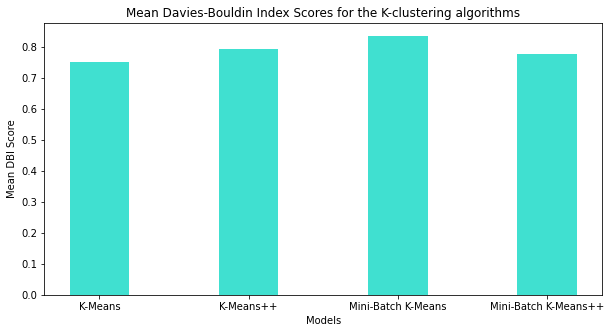

In [143]:
# Construct a plot to display the mean DBI scores

data = {'K-Means': mean_dbi_01,
        'K-Means++': mean_dbi_02,
        'Mini-Batch K-Means': mean_dbi_03,
        'Mini-Batch K-Means++': mean_dbi_04}

models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(models, scores, color ='turquoise', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean DBI Score")
plt.title("Mean Davies-Bouldin Index Scores for the K-clustering algorithms")
plt.show()

<p>The K-Means algorithm has the lowest average DBI score, meaning that the clusters formed have the lowest average similarity and therefore had the best performance.</p>

#### Comparing the Silhouette and DBI Scores
<p>The table below will list both the average silhouette and average DBI scores for each algorithm</p>

In [90]:
# Build a dataframe for comparing the mean Davies-Bouldin Index scores
#  with the mean Silhouette Scores.

# The dictionary
data_01 = {'Model': list(data.keys()), 
           'Mean Silhouette Score': [mean_k_means_scores_tsne,
                                  mean_k_means_plus_scores_tsne,
                                  mean_mini_k_means_scores_tsne,
                                  mean_mini_k_means_plus_scores_tsne], 
           'Mean DBI Score': (data.values())}

# The dataframe
df_mean_scores = pd.DataFrame(data_01)
df_mean_scores

,Model,Mean Silhouette Score,Mean DBI Score
0,K-Means,0.474098,0.752788
1,K-Means++,0.456901,0.792738
2,Mini-Batch K-Means,0.433287,0.836388
3,Mini-Batch K-Means++,0.462376,0.779133


<p>The K-Means algorithm has the highest average silhouette score and the lowest DBI score, which makes this algorithm the top performing algorithm. In contrast, the Mini-Batch K-Means algorithm had the lowest average silhouette score and highest average DBI score, making it the least preferred algorithm.</p>

#### Visualizing the K-Means Clusters
<p>With K-Means chosen as the preferred algorithm, the clusters formed will be analyzed for each value of k.</p>
<p>This will be accomplished by creating a silhouette plot of the clusters were formed as well as a visual display of those clusters.</p>

For k_clusters = 2 The average silhouette_score is : 0.46211275
For k_clusters = 3 The average silhouette_score is : 0.5098313
For k_clusters = 4 The average silhouette_score is : 0.49961483
For k_clusters = 5 The average silhouette_score is : 0.48484483
For k_clusters = 6 The average silhouette_score is : 0.47454652
For k_clusters = 7 The average silhouette_score is : 0.4577051
For k_clusters = 8 The average silhouette_score is : 0.43003103


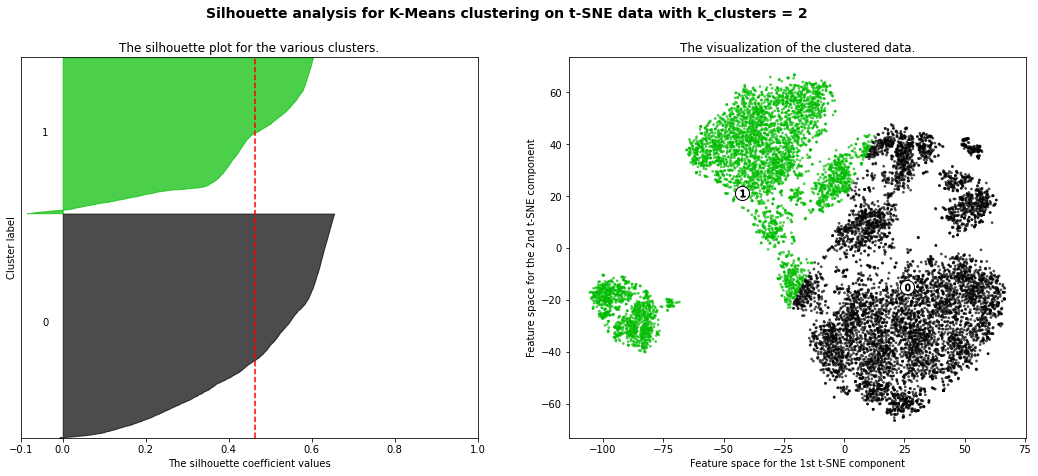

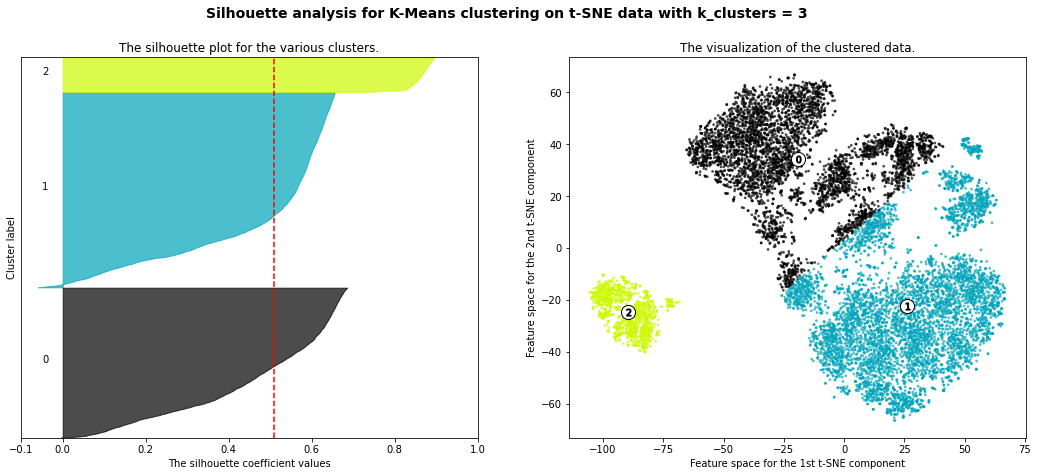

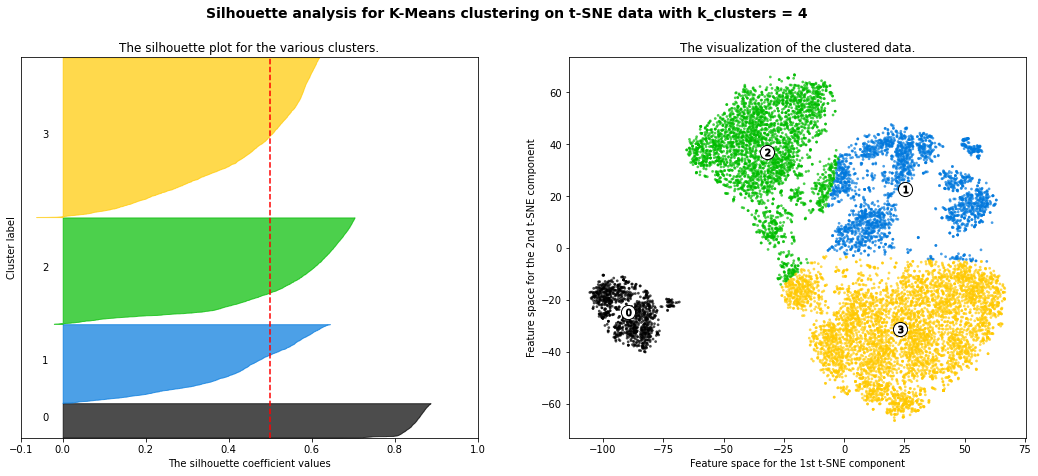

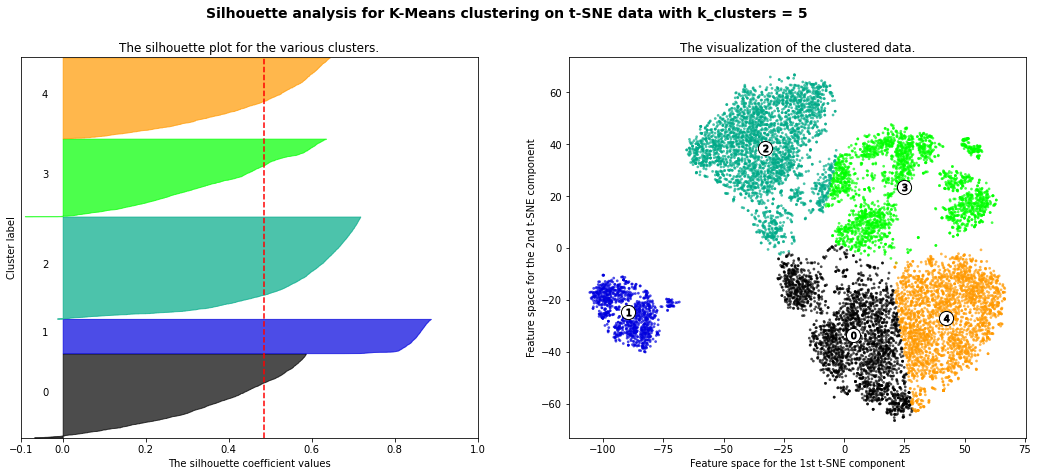

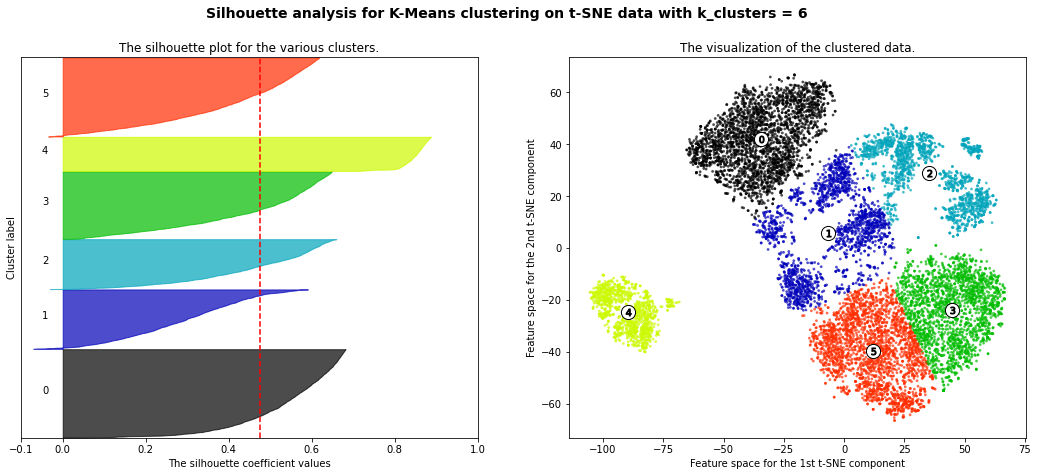

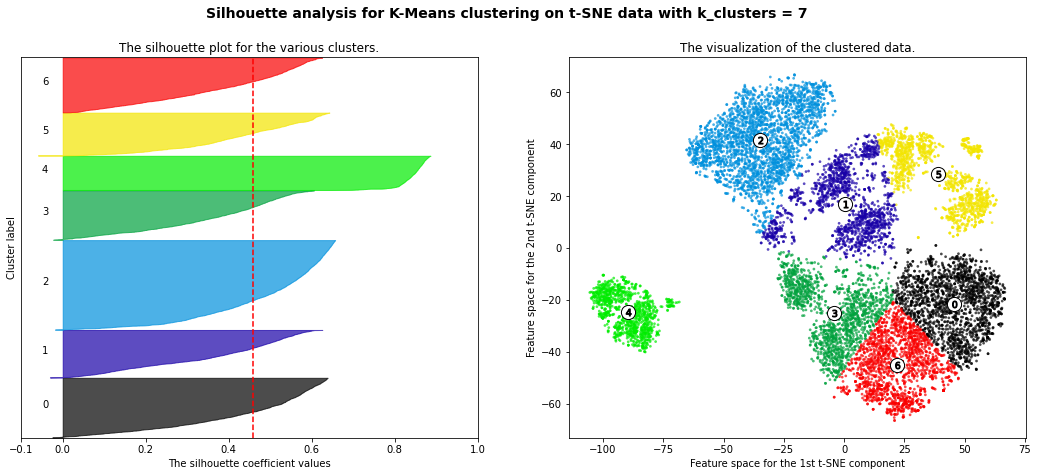

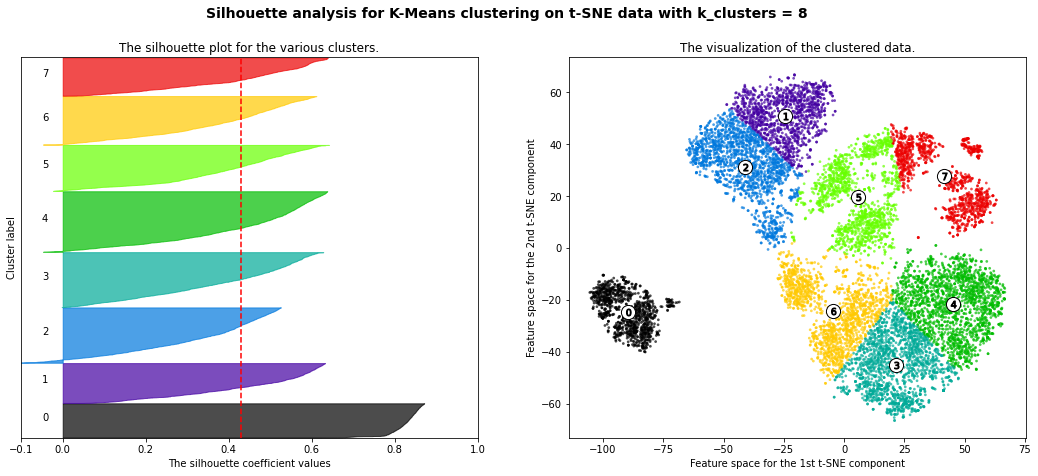

In [91]:
for k_clusters in range_k_values:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (k_clusters + 1) * 10])

    # Initialize the model with k_clusters value and a random generator
    # seed of 0 for reproducibility.
    model = KMeans(n_clusters = k_clusters, init = "random", n_init = "auto", random_state = 0)
    model_labels = model.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, model_labels)
    print(
        "For k_clusters =",
        k_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, model_labels)

    y_lower = 10
    for i in range(k_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[model_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor = color,
            edgecolor = color,
            alpha = 0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(model_labels.astype(float) / k_clusters)
    ax2.scatter(
        X2['tsne0'], X2['tsne1'], marker = ".", s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = "k"
    )

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker = "o",
        c = "white",
        alpha = 1,
        s = 200,
        edgecolor = "k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = "$%d$" % i, alpha = 1, s = 50, edgecolor = "k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st t-SNE component")
    ax2.set_ylabel("Feature space for the 2nd t-SNE component")

    plt.suptitle(
        "Silhouette analysis for K-Means clustering on t-SNE data with k_clusters = %d"
        % k_clusters,
        fontsize = 14,
        fontweight = "bold",
    )

plt.show()

<p>Examining the silhouette plots for each value of k, all of them may appear to provide clusters whose individual silhouette score was greater than the mean of all the scores. However, some of these clusters contained data points that do not belong there. In the silhouette plot, this is represented by a short tail that appears at the left-hand side of the plot (e.g., cluster 2 of the silhouette plot when k = 8). In the context of the research question, this would represent songs that Spotify decided would be a good fit for that playlist based on certain values, but the listener would discover that it doesn't mesh with the other songs in that playlist.</p>
<p>With that information considered, the K-Means algorithm had its best performance when the values of k were set to 3 and 4. This means that these values provided the best fits for the data. Even though the separation of clusters is not perfect, the cluster formations for these k values are much better than those of the others.</p>

## Analyzing Cluster Quality & Playlist Predictions
<p>The quality of the clusters formed by k values of 3 and 4 will be analyzed by observing the mean values of certain song features, similar to what was done during genre analysis. These means values will provide information about the songs that are included in each cluster.</p>
<p>Then, a Logistic Regression model will be used to simulate how Spotify adds songs to playlists that have already been customized. In other words, the model will learn about the songs from each cluster to determine where newer songs should be assigned.</p>

<p>The success of the Logistic Regression model will be measured by how well it is able to identify the best playlist for that song (i.e., the correct cluster). The success will also be measured by what cluster (or playlist) the model incorrectly predicted for that song. For example, if the songs of two clusters are similar to each other, this will not be much of an issue. However, if two clusters are completely dissimilar to each other, then this can be a huge problem when trying to construct unique playlists for a user.</p>

### Clusters of k = 3

#### Execute the K-Means Algorithm for k = 3
<p>First, the K-Means algorithm will be executed using the values of k = 3.</p>

In [92]:
# Initialize the K-Means algorithm with the value of k = 3
# Then, fit the t-SNE dataset to get the labels
k3_model = KMeans(n_clusters = 3, init = "random", n_init = "auto", random_state = 0)
k3_labels = k3_model.fit_predict(X2)

#### Assigning cluster labels
<p>Next, each song in the dataset will be assigned labels that were produced by the model.</p>

In [93]:
# Declare a list to be converted to a column
cluster_k3 = list(k3_labels) # For k = 3 dataset

In [94]:
# Create copies of the sampled dataset
df_k3_subset = df_subset

In [95]:
# Add the cluster column to the new dataframe
df_k3_subset['cluster'] = cluster_k3

In [96]:
# View the result for the K = 3 model
df_k3_subset.head(10)

,track_id,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.844433,0,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,4.080000,0,0.627,0.363,8,...,1,0.0291,0.2790,0.000000,0.0928,0.301,99.905,4,acoustic,1
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,4.049100,0,0.703,0.444,11,...,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,acoustic,1
30,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,0,2.196000,0,0.620,0.309,5,...,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic,1
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,5.113233,0,0.474,0.519,7,...,1,0.0253,0.2810,0.000000,0.1070,0.326,151.832,4,acoustic,1
50,72xTsTouZ5nBmASX8k1XCW,Highland Peak,Trampoline (Acoustic),Trampoline - Acoustic,46,3.551633,0,0.596,0.200,0,...,0,0.0305,0.9100,0.000183,0.0884,0.308,107.893,4,acoustic,0
60,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,75,4.240000,0,0.375,0.457,3,...,1,0.0315,0.8680,0.014500,0.1910,0.415,174.839,3,acoustic,1
70,16dkWKIlBsfYTISCVuDs0w,Ron Pope,Whatever It Takes,A Drop In the Ocean,55,3.658000,0,0.484,0.573,5,...,1,0.0298,0.0882,0.000001,0.1500,0.346,139.966,3,acoustic,1
80,2kMrCPZ0o5gErBPLCRgoli,Gabrielle Aplin,Mellow Adult Pop,Heavy Heart,0,3.919550,0,0.451,0.700,10,...,0,0.0431,0.4550,0.002330,0.4050,0.370,150.055,4,acoustic,0
90,04JS6OitE9VGsIS3S94Osg,The Civil Wars,Slow Christmas Songs 2022,I Heard The Bells On Christmas Day,0,2.574000,0,0.492,0.145,2,...,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic,0


<p>Each dataset now includes a column for the cluster that each song belongs to. This is the equivalent of assigning songs to playlist on Spotify.</p>

#### Observing the mean values for the features of each cluster
<p>The clusters formed will be analyzed by observing the mean values for each feature. These mean values will be used to determine the quality and uniqueness of the clusters.</p>

In [97]:
# Create a list of all the features to be observed
obs_features = [
        'popularity',
        'duration',
        'danceability',
        'energy',
        'loudness',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo']

In [98]:
# Build a dataframe for the mean values of each feature by cluster

df_k3_averages = df_k3_subset.groupby("cluster")[obs_features].mean()
df_k3_averages.reset_index(inplace = True)
df_k3_averages.head(10)

,cluster,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,35.684444,4.049304,0.554372,0.620952,-9.304585,0.081640,0.324807,0.277848,0.216381,0.418346,119.506053
1,1,36.046440,3.713887,0.565142,0.631679,-7.799323,0.069309,0.329936,0.077154,0.201708,0.499259,122.797947
2,2,41.367604,3.353404,0.640167,0.710151,-6.509198,0.181647,0.203718,0.046341,0.232158,0.459394,120.492423


<p>Although these results do not show any major differences in the composition of these clusters, the average values of the features for cluster 2 appear to be higher than the others, especially for popularity, dancebilility, energy, and loudness. These values would suggest that many of the more popular and mainstream songs would be part of this playlist.</p>
<p>Clusters 0 and 1 appear to be more similar to each other.. The songs of cluster 0 have a longer duration but are quieter than the songs in clusters 1 and 2. These songs may be more laid-back in terms of their vibe. The songs in cluster 1 are also louder and have more valence, as well as have a higher tempo, suggesting a slightly happier playlist.</p>

#### Mean Feature Summary for Cluster Analysis (K = 3)
<p>For further analysis, a table will be created to display the clusters with the highest and lowest mean values for each feature.</p>

In [99]:
# Create a dataframe for displaying the clusters containing the highest and lowest mean values for each feature
df_mm_cluster = pd.DataFrame(columns=['feature','max_cluster', 'max_value', 'min_cluster', 'min_value'])

In [100]:
# Fill the dataframe with the maximum and minimum values for each feature,
#  and the clusters that contain those respective values.
for fe in obs_features:
    mx_ft = df_k3_averages[fe].max() # The maximum value for a given feature
    idx_01 = df_k3_averages[fe].idxmax() # Index of the row containing the max
    c_max = str(int(df_k3_averages.iloc[idx_01]['cluster'])) # Cluster of the max
    
    mn_ft = df_k3_averages[fe].min() # The minimum value for a given feature
    idx_02 = df_k3_averages[fe].idxmin() # Index of the row contaiing the min
    c_min = str(int(df_k3_averages.iloc[idx_02]['cluster'])) # Cluster of the min
    
    feat = fe # The given feature
    
    # Add to the dataframe
    df_mm_cluster.loc[len(df_mm_cluster.index)] = [feat, c_max, mx_ft, c_min, mn_ft]

In [101]:
# Display the dataframe
display(df_mm_cluster)

,feature,max_cluster,max_value,min_cluster,min_value
0,popularity,2,41.367604,0,35.684444
1,duration,0,4.049304,2,3.353404
2,danceability,2,0.640167,0,0.554372
3,energy,2,0.710151,0,0.620952
4,loudness,2,-6.509198,0,-9.304585
5,speechiness,2,0.181647,1,0.069309
6,acousticness,1,0.329936,2,0.203718
7,instrumentalness,0,0.277848,2,0.046341
8,liveness,2,0.232158,1,0.201708
9,valence,1,0.499259,0,0.418346


<p>The table above shows that cluster 2 has the greatest mean values for most of the features listed, while cluster 0 had most of the lowest values. However, these values for cluster 0 are pretty close in similarity to cluster 1 so that result can be misleading. If a few other songs were included in other playlist, that may greatly impact the results.</p>

### Playlist Prediction with k = 3 dataset

<p>With the songs assigned to clusters, the Logistic Regression model will be trained to predict those clusters based on song data. Then, it will use what it learned to make predictions for new songs. The results of these predictions will measure the model's ability to identify the best playlist for these songs.</p>

#### Defining the X and y variables
<p>The X variable will contain all the feature data for each song while the y variable will store the cluster that the songs belong to. <b>The cluster is the value to be predicted.</b></p>

In [102]:
# Set up the X and y variables
X4 = df_k3_subset[obs_features] # Features
y1 = df_k3_subset.cluster # Target

# Return a count of songs for each clsuter
pd.DataFrame(y1.value_counts())

,cluster
1,5857
0,4500
2,1031


<p>Given the count of songs in each of these clusters, the dataset appears to be imbalanced. To prevent this imbalance from impacting the model's predictions, cross-validation will be required.</p>

#### Cross-validation using Stratified K-Fold
<p>Stratified K-Fold is an algorithm that addresses the imbalances within the dataset by creating k number of folds. One fold will be used for testing and the remaining folds will be used for training. The algorithm ensures that all the data is used for both training and testing.</p>
<p>Using Stratified K-Fold, all songs from all the clusters will be used to train and test. The model will have learned from all of the songs in every cluster, improving the quality of the predictions.</p>

#### The train_model function
<p>The 'train_model()' function will evaluate the performance for each fold.</p>

In [103]:
# train - training data
# test - testing data
# fold_no - fold number
# train_X - feature values for the training data used for each fold
# train_y - target values for the training data used for each fold
# test_X - feature values for the testing data used for each fold
# test_y - target values for the testing data used for each fold
# preds - predictions
# model_0 - the model to be trained
# scores - contains a list of the F1 scores for each fold
def train_model(train, test, fold_no, train_X, train_y, test_X, test_y, preds, model_0, scores):
    # Set up features and targets
    X0 = obs_features # features
    y0 = ['cluster'] # target
    
    # Scale features for both training and testing sets
    scaler = preprocessing.StandardScaler()
    
    # Initialize features and targets for training and testing
    X0_train = scaler.fit_transform(train[X0])
    y0_train = train[y0]
    X0_test = scaler.fit_transform(test[X0])
    y0_test = test[y0]
    
    # Fit the training data to the model
    model_0.fit(X0_train,y0_train.values.ravel())
    
    # Make the predictions
    y0_pred = model_0.predict(X0_test)
    
    # Append training and testing data to lists for storage
    # This data will be used to determine the best folds
    train_X.append(X0_train)
    train_y.append(y0_train)
    test_X.append(X0_test)
    test_y.append(y0_test)
    
    # Append predictions to a list
    preds.append(y0_pred)
    
    # Each model will have its own list of F1 scores to evaluate their overall performance
    scores.append(round(metrics.f1_score(y0_test,y0_pred,average='weighted'), 3))
    
    print('Fold',str(fold_no),'F1 Score:',round(metrics.f1_score(y0_test,y0_pred,average='weighted'),3))

#### Recording fold predictions and their F1 Scores
<p>The f1 score metric will be used to measure the accuracy of the predictions.</p>

In [104]:
# The predictions for each fold
fold_preds_k3 = []
# The F1 Scores of each fold
fold_scores_k3 = []

#### The training and testing sets for each fold
<p>These lists will contain the results of cross-validation for each fold.</p>

In [105]:
# List of training sets used for each fold
X_train_sets_k3 = []
y_train_sets_k3 = []

# List of testing sets used for each fold
# These will be used for evaluation purposes
X_test_sets_k3 = []
y_test_sets_k3 = []

#### Initialize the Logistic Regression model
<p>The Logistic Regression model for fitting the dataset will be intialized to handle multiclass targets and ensure the reproduction of the results.</p>

In [106]:
log_k3 = LogisticRegression(random_state=0, multi_class='multinomial')

#### Initialize the Stratified K-Fold algorithm
<p>The Stratified K-Fold algorithm will be initialized to perform cross validation on the Logistic Regression model to obtain the best training and testing data that will be used later to simulate playlist predictions. For this algorithm, the number of splits will be set to 10.</p>

In [107]:
# Initialize the Stratified K-fold algorithm
# The number of splits will be set to 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

#### Performing Cross-Validation on k = 3 Data
<p>Cross-validation will now be performed on the dataset formed from the K-Means algorithm when k = 3.</p>

In [108]:
fold_no = 1
for train_idx, test_idx in skf.split(df_k3_subset, y1):
    train_k3 = df_k3_subset.iloc[train_idx,:]
    test_k3 = df_k3_subset.iloc[test_idx,:]
    train_model(train_k3, test_k3, fold_no, X_train_sets_k3, y_train_sets_k3, 
                X_test_sets_k3, y_test_sets_k3, fold_preds_k3, log_k3, fold_scores_k3)
    fold_no += 1
    
# Print the results
print('\nMaximum F1 Score that can be obtained from this model is:',
      max(fold_scores_k3))
print('\nMinimum F1 Score:',
      min(fold_scores_k3))
print('\nOverall F1 Score:',
      round(statistics.mean(fold_scores_k3),3))

Fold 1 F1 Score: 0.599
Fold 2 F1 Score: 0.577
Fold 3 F1 Score: 0.581
Fold 4 F1 Score: 0.576
Fold 5 F1 Score: 0.585
Fold 6 F1 Score: 0.548
Fold 7 F1 Score: 0.556
Fold 8 F1 Score: 0.586
Fold 9 F1 Score: 0.584
Fold 10 F1 Score: 0.568

Maximum F1 Score that can be obtained from this model is: 0.599

Minimum F1 Score: 0.548

Overall F1 Score: 0.576


<p>The results from the first set of folds yielded the best results with a score of 0.599 (approximately 60%). Therefore, the data from this fold will be used when re-fitting the Logistic Regression model.</p>

#### Fit best K-Fold data to the Logistic Regression Model
<p>The data from the best fold will be used to re-train the Logistic Regression Model and make predictions. The goal is to train the algorithm to classify songs in the correct cluster based on their features.</p>

In [109]:
best_index_k3 = fold_scores_k3.index(max(fold_scores_k3)) # The index
best_preds_k3 = fold_preds_k3[best_index_k3] # The predictions

#### Get the training and testing data for the best model
<p>Now, the training and testing data used by the best K-Fold model will be accessed and stored.</p>

In [110]:
# Training data
best_X_train_k3 = X_train_sets_k3[best_index_k3]
best_y_train_k3 = y_train_sets_k3[best_index_k3]

# Testing data
best_X_test_k3 = X_test_sets_k3[best_index_k3]
best_y_test_k3 = y_test_sets_k3[best_index_k3]

#### Use GridSearch to obtain optimal values for the model's parameters
<p>To optimize the Logistic Regression model, a set of hyperparameters will be initialized.</p>

In [111]:
# Set up the hyperparameters
c_space = np.logspace(-5, 8, 15)
iterations = np.arange(100,1000,100)
log_params = {'C': c_space, 'max_iter': iterations}

#### Re-initialize the model with the hyperparameters
<p>The Logistic Regression model will be re-initialized using the hyperparameters. GridSearch will be used to return the optimal parameters.</p>

In [112]:
# Re-initialize the Logistic Regression model
log_k3 = LogisticRegression(random_state=0, multi_class='multinomial')

# Initialize the model using the hyperparameters
log_k3_gs = GridSearchCV(log_k3, log_params)

#### Fit the model using the K-Fold data
<p>Using the best data from cross-validation, the Logistic Regression model will be executed.</p>

In [113]:
# Store the name of the model for easy reference
model_name = type(log_k3_gs).__name__

# Train the model
log_k3_gs.fit(best_X_train_k3, best_y_train_k3.values.ravel())
    
# Training set predictions
train_preds_k3 = log_k3_gs.predict(best_X_train_k3)
    
# Testing set predictions
test_preds_k3 = log_k3_gs.predict(best_X_test_k3)
    
# Results
train_k3_f1_score = round(metrics.f1_score(best_y_train_k3, train_preds_k3, average='weighted',zero_division=0), 3)
test_k3_f1_score = round(metrics.f1_score(best_y_test_k3, test_preds_k3, average='weighted', zero_division=0), 3)
    
print("\nResults for the " + str(model_name) + ": ")
print("Training: " + str(train_k3_f1_score) + ", Testing: " + str(test_k3_f1_score))


Results for the GridSearchCV: 
Training: 0.572, Testing: 0.595


<p>Using the best parameters obtained from GridSearch, the Logistic Regression model returned F1 scores that were below a decent rate.</p>

#### Permutation Importance for the K = 3 dataset
<p>The permutation importance for each feature will be calculated to measure their impact on the model's predictions.</p>

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation (K = 3 Dataset)')

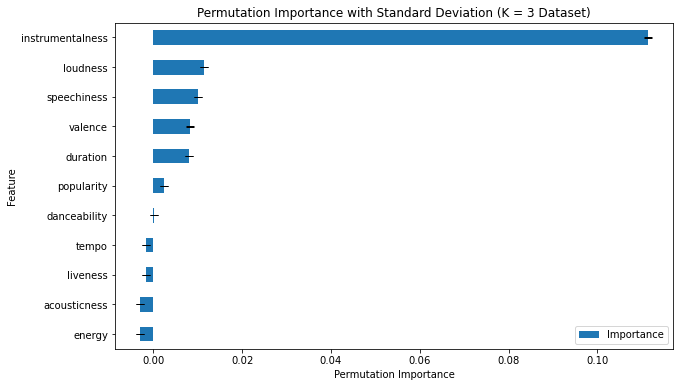

In [114]:
result = permutation_importance(log_k3_gs, best_X_test_k3, best_y_test_k3, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X4.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation (K = 3 Dataset)')

<p>The graph above shows that instrumentalness had a substantial impact on how the model predicted the cluster each song belonged to. The difference between the importance of this feature and the next important feature, loudness, is a measure of its significance. This could make sense considering how different the mean instrumentalness value for cluster 0 is compared with the other clusters.</p>

#### Return the best parameters for the Logistic Regression model

In [115]:
print("Best Logistic Regression parameters: {}".format(log_k3_gs.best_params_))

Best Logistic Regression parameters: {'C': 0.006105402296585327, 'max_iter': 100}


<p>These represent the parameters that the Logistic Regression model used to provide the results.</p>

### Results of Logistic Regression
<p>The results of the Logistic Regression model will now be evaluated to determine the quality of the model's predictions for each cluster. The quality of these predictions will measure the ability of the model to build unique playlists from analysis of song data, especially when the genre information is not available.</p>

#### Confusion Matrix
<p>The confusion matrix will visualize the model's predictions for each label by comparing the predicted cluster for each song with the actual cluster of each song.</p>

In [116]:
# Create cluster labels
clus_labels_k3 = list(y1.unique())
clus_labels_k3.sort()

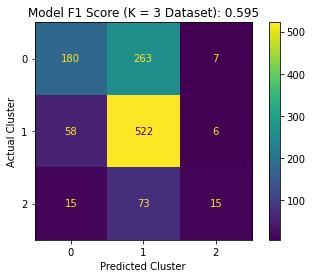

In [117]:
# Create the confusion matrix
conf_matrix_k3 = metrics.confusion_matrix(best_y_test_k3,test_preds_k3)

# Build the display for the confusion matrix
mat_display_k3 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_k3, display_labels = clus_labels_k3)

# Get the F1 Score for the Logistic Regression model
log_k3_f1_score = round(metrics.f1_score(best_y_test_k3, test_preds_k3, average='weighted', zero_division=0),3)

# Display the confusion matrix
mat_display_k3.plot()
plt.ylabel('Actual Cluster');
plt.xlabel('Predicted Cluster');
all_sample_title = 'Model F1 Score (K = 3 Dataset): {0}'.format(log_k3_f1_score)
plt.title(all_sample_title, size = 12)
plt.show()

#### Classification Report
<p>The Classification Report will provide more information in regards to the performance of the Logistic Regression model.</p>

In [118]:
clf_report_k3 = metrics.classification_report(best_y_test_k3, test_preds_k3, zero_division=0)
print(clf_report_k3)

              precision    recall  f1-score   support

           0       0.71      0.40      0.51       450
           1       0.61      0.89      0.72       586
           2       0.54      0.15      0.23       103

    accuracy                           0.63      1139
   macro avg       0.62      0.48      0.49      1139
weighted avg       0.64      0.63      0.59      1139



<p>From the confusion matrix and classification report, the model performed best when it came to learning about the features for the songs of cluster 1, with an f1-score of 72%. It had a higher recall score (89%) than precision score (61%), meaning it was able to correctly identify songs that belong to that cluster out of the songs that actually belong to that cluster.</p>
<p>The model had better precision when it came to identifying the songs of cluster 0, meaning that more of the songs that it included in the playlist actually belong to that playlist.</p>
<p>The model had its poorest performance with the songs of cluster 2 based on its precision, recall, and f1-scores. This may be contributed by the low number of songs in that cluster, making it a learning challenge.</p>

#### Execute the K-Means Algorithm for k = 4
<p>Cluster analysis will now be performed for the dataset produced by the K-Means algorithm when kis set to 4. It will follow the same procedure when K was set to 3.</p>

In [119]:
# Initialize the K-Means algorithm with the value of k = 4
# Then, fit the t-SNE dataset to get the labels
k4_model = KMeans(n_clusters = 4, init = "random", n_init = "auto", random_state = 0)
k4_labels = k4_model.fit_predict(X2)

#### Assigning cluster labels
<p>Like with k = 3, the cluster data from the K-Means model will be assigned to every song in the dataset.</p>

In [120]:
# Declare a list to be converted to a column
cluster_k4 = list(k4_labels) # For K = 4 dataset

In [121]:
# Create copies of the sampled dataset
df_k4_subset = df_subset

In [122]:
# Add the cluster column to the new dataframe
df_k4_subset['cluster'] = cluster_k4

In [123]:
# View the result for the K = 4 model
df_k4_subset.head(10)

,track_id,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.844433,0,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2
10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,4.080000,0,0.627,0.363,8,...,1,0.0291,0.2790,0.000000,0.0928,0.301,99.905,4,acoustic,3
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,4.049100,0,0.703,0.444,11,...,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,acoustic,3
30,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,0,2.196000,0,0.620,0.309,5,...,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic,3
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,5.113233,0,0.474,0.519,7,...,1,0.0253,0.2810,0.000000,0.1070,0.326,151.832,4,acoustic,3
50,72xTsTouZ5nBmASX8k1XCW,Highland Peak,Trampoline (Acoustic),Trampoline - Acoustic,46,3.551633,0,0.596,0.200,0,...,0,0.0305,0.9100,0.000183,0.0884,0.308,107.893,4,acoustic,2
60,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,75,4.240000,0,0.375,0.457,3,...,1,0.0315,0.8680,0.014500,0.1910,0.415,174.839,3,acoustic,1
70,16dkWKIlBsfYTISCVuDs0w,Ron Pope,Whatever It Takes,A Drop In the Ocean,55,3.658000,0,0.484,0.573,5,...,1,0.0298,0.0882,0.000001,0.1500,0.346,139.966,3,acoustic,1
80,2kMrCPZ0o5gErBPLCRgoli,Gabrielle Aplin,Mellow Adult Pop,Heavy Heart,0,3.919550,0,0.451,0.700,10,...,0,0.0431,0.4550,0.002330,0.4050,0.370,150.055,4,acoustic,2
90,04JS6OitE9VGsIS3S94Osg,The Civil Wars,Slow Christmas Songs 2022,I Heard The Bells On Christmas Day,0,2.574000,0,0.492,0.145,2,...,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic,2


#### Observing the mean values for the features of each of the k = 4 clusters

In [124]:
# Build a dataframe for the mean values of each feature by cluster

df_k4_averages = df_k4_subset.groupby("cluster")[obs_features].mean()
df_k4_averages.reset_index(inplace = True)
df_k4_averages.head(10)

,cluster,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,41.367604,3.353404,0.640167,0.710151,-6.509198,0.181647,0.203718,0.046341,0.232158,0.459394,120.492423
1,1,31.392389,4.285856,0.486451,0.467434,-12.919331,0.061955,0.485896,0.590377,0.171181,0.305769,119.427290
2,2,37.895592,3.810335,0.587490,0.701421,-6.921249,0.089400,0.238712,0.067375,0.229154,0.490144,121.957831
3,3,36.768830,3.682201,0.578943,0.656103,-7.272266,0.071106,0.309052,0.018868,0.212228,0.524850,121.931185


<p>Clusters 0 and 1 appear more unique than clusters 2 and 3, which appear to be similar in composition.</p>
<p>The songs in cluster 0 appear to be more popular, energetic, and danceable, while the songs in cluster 1 appear to contain more acoustics and are not as energetic or loud. It can be assumed that cluster 0 contains more songs that are pop-and-dance oriented while cluster 1 contains songs that are more downtempo and lacking in any feel-good emotions (e.g, ambient).</p>
<p>Clusters 2 and 3 are much more similar to each other, meaning that they could containing the same type of songs.</p>

#### Mean Feature Summary for Cluster Analysis (k = 4)

In [125]:
# Create a dataframe for displaying the clusters containing the highest and lowest mean values for each feature
df_mm_cluster_02 = pd.DataFrame(columns=['feature','max_cluster', 'max_value', 'min_cluster', 'min_value'])

In [126]:
# Fill the dataframe with the maximum and minimum values for each feature,
#  and the clusters that contain those respective values.
for fe in obs_features:
    mx_ft = df_k4_averages[fe].max() # The maximum value for a given feature
    idx_01 = df_k4_averages[fe].idxmax() # Index of the row containing the max
    c_max = str(int(df_k4_averages.iloc[idx_01]['cluster'])) # Cluster of the max
    
    mn_ft = df_k4_averages[fe].min() # The minimum value for a given feature
    idx_02 = df_k4_averages[fe].idxmin() # Index of the row contaiing the min
    c_min = str(int(df_k4_averages.iloc[idx_02]['cluster'])) # Cluster of the min
    
    feat = fe # The given feature
    
    # Add to the dataframe
    df_mm_cluster_02.loc[len(df_mm_cluster_02.index)] = [feat, c_max, mx_ft, c_min, mn_ft]

In [127]:
# Display the dataframe
display(df_mm_cluster_02)

,feature,max_cluster,max_value,min_cluster,min_value
0,popularity,0,41.367604,1,31.392389
1,duration,1,4.285856,0,3.353404
2,danceability,0,0.640167,1,0.486451
3,energy,0,0.710151,1,0.467434
4,loudness,0,-6.509198,1,-12.919331
5,speechiness,0,0.181647,1,0.061955
6,acousticness,1,0.485896,0,0.203718
7,instrumentalness,1,0.590377,3,0.018868
8,liveness,0,0.232158,1,0.171181
9,valence,3,0.524850,1,0.305769


<p>Like with the k = 3 dataset, one cluster (cluster 0) had the highest mean values for the most features, while another cluster (cluster 1) had the lowest mean values for many of the features. This table confirms the uniqueness of clusters 0 and 1.</p>

### Playlist Prediction with the k = 4 dataset
<p>Just like with the k = 3 dataset, Logistic Regression will be used to make predictions using the k = 4 dataset.</p>

#### Defining the X and y variables for the K = 4 dataset

In [128]:
# Set up the X and y variables
X5 = df_k4_subset[obs_features] # Features
y2 = df_k4_subset.cluster # Target
pd.DataFrame(y2.value_counts())

,cluster
3,4793
2,3199
1,2365
0,1031


<p>Once again, there is a imbalance in the nubmer of songs contained in each cluster. Therefore, cross-validation is required.</p>

### Cross-validation for the k = 4 dataset
<p>Stratified K-Fold will now be performed using the k = 4 dataset. The setup is the same as it was for k = 3.</p>

### Set up lists for predicted values and scores (k = 4)

In [129]:
# The predictions for each fold
fold_preds_k4 = []
# The F1 Scores of each fold
fold_scores_k4 = []

### The training and testing sets for each fold (k = 4)

In [130]:
# List of training sets used for each fold
X_train_sets_k4 = []
y_train_sets_k4 = []

# List of testing sets used for each fold
# These will be used for evaluation purposes
X_test_sets_k4 = []
y_test_sets_k4 = []

### Initialize the Logistic Regression model for the k = 4 dataset

In [131]:
log_k4 = LogisticRegression(random_state=0, multi_class='multinomial')

### Initialize the Stratified K-Fold algorithm (k = 4)
<p>The Stratified K-Fold algorithm will be initialized to perform cross validation on the K = 4 Logistic Regression model.</p>

In [132]:
# Initialize the Stratified K-fold algorithm
# The number of splits will be set to 10
skf_02 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

#### Performing Cross-Validation on k = 4 Data

In [133]:
fold_no = 1
for train_idx, test_idx in skf_02.split(df_k4_subset, y2):
    train_k4 = df_k4_subset.iloc[train_idx,:]
    test_k4 = df_k4_subset.iloc[test_idx,:]
    train_model(train_k4, test_k4, fold_no, X_train_sets_k4, y_train_sets_k4, 
                X_test_sets_k4, y_test_sets_k4, fold_preds_k4, log_k4, fold_scores_k4)
    fold_no += 1
    
# Print the results
print('\nMaximum F1 Score that can be obtained from this model is:',
      max(fold_scores_k4))
print('\nMinimum F1 Score:',
      min(fold_scores_k4))
print('\nOverall F1 Score:',
      round(statistics.mean(fold_scores_k4),3))

Fold 1 F1 Score: 0.521
Fold 2 F1 Score: 0.53
Fold 3 F1 Score: 0.514
Fold 4 F1 Score: 0.526
Fold 5 F1 Score: 0.509
Fold 6 F1 Score: 0.479
Fold 7 F1 Score: 0.528
Fold 8 F1 Score: 0.524
Fold 9 F1 Score: 0.505
Fold 10 F1 Score: 0.508

Maximum F1 Score that can be obtained from this model is: 0.53

Minimum F1 Score: 0.479

Overall F1 Score: 0.514


<p>Based on the f1 scores for each fold as well as the overall score, the algorithm had a poorer performance when it came to adding the songs in their appropriate playlists.</p>

### Fit best K-Fold data to the Logistic Regression Model (K = 4)
<p>By fitting the best k-fold data to the Logistic Regression Model, we will try to determine how well the model performed when it came to learning about the songs in every cluster.</p>

#### Obtain the index and predictions from the best K-Fold model (K = 4)

In [134]:
best_index_k4 = fold_scores_k4.index(max(fold_scores_k4)) # The index
best_preds_k4 = fold_preds_k4[best_index_k4] # The predictions

#### Get the training and testing data for the best model (K = 4)

In [135]:
# Training data
best_X_train_k4 = X_train_sets_k4[best_index_k4]
best_y_train_k4 = y_train_sets_k4[best_index_k4]

# Testing data
best_X_test_k4 = X_test_sets_k4[best_index_k4]
best_y_test_k4 = y_test_sets_k4[best_index_k4]

#### Re-initialize the K = 4 model with the hyperparameters

In [136]:
# Re-initialize the Logistic Regression model
log_k4 = LogisticRegression(random_state=0, multi_class='multinomial')

# Initialize the model using the hyperparameters
log_k4_gs = GridSearchCV(log_k4, log_params)

#### Fit the model using the K-Fold data (K = 4)

In [137]:
# Store the name of the model for easy reference
model_name_02 = type(log_k4_gs).__name__

# Train the model
log_k4_gs.fit(best_X_train_k4, best_y_train_k4.values.ravel())
    
# Training set predictions
train_preds_k4 = log_k4_gs.predict(best_X_train_k4)
    
# Testing set predictions
test_preds_k4 = log_k4_gs.predict(best_X_test_k4)
    
# Results
train_k4_f1_score = round(metrics.f1_score(best_y_train_k4, train_preds_k4, average='weighted',zero_division=0), 3)
test_k4_f1_score = round(metrics.f1_score(best_y_test_k4, test_preds_k4, average='weighted', zero_division=0), 3)
    
print("\nResults for the " + str(model_name_02) + ": ")
print("Training: " + str(train_k4_f1_score) + ", Testing: " + str(test_k4_f1_score))


Results for the GridSearchCV: 
Training: 0.516, Testing: 0.53


<p>The algorithm did a poorer job learning about the data, which explains the poor f1 scores from cross-validation.</p>

#### Return the best parameters for the Logistic Regression model (k = 4)

In [138]:
print("Best Logistic Regression parameters: {}".format(log_k4_gs.best_params_))

Best Logistic Regression parameters: {'C': 0.4393970560760795, 'max_iter': 100}


#### Permutation Importance for the K = 4 dataset

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation (K = 4 Dataset)')

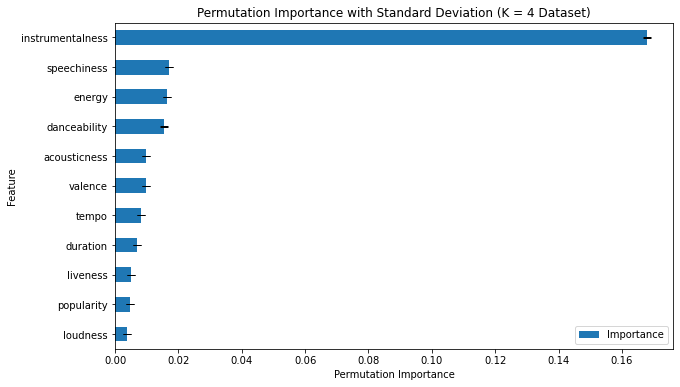

In [139]:
result = permutation_importance(log_k4_gs, best_X_test_k4, best_y_test_k4, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X5.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation (K = 4 Dataset)')

<p>Like with the K = 3 dataset, instrumentalness was the feature with the highest importance when it came to making playlist predictions.</p>

### Results of Logistic Regression (k = 4)

#### Confusion Matrix

In [140]:
# Create cluster labels
clus_labels_k4 = list(y2.unique())
clus_labels_k4.sort()

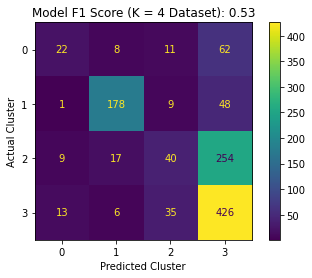

In [141]:
# Create the confusion matrix
conf_matrix_k4 = metrics.confusion_matrix(best_y_test_k4,test_preds_k4)

# Build the display for the confusion matrix
mat_display_k4 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_k4, display_labels = clus_labels_k4)

# Get the F1 Score for the Logistic Regression model
log_k4_f1_score = round(metrics.f1_score(best_y_test_k4, test_preds_k4, average='weighted', zero_division=0),3)

# Display the confusion matrix
mat_display_k4.plot()
plt.ylabel('Actual Cluster');
plt.xlabel('Predicted Cluster');
all_sample_title = 'Model F1 Score (K = 4 Dataset): {0}'.format(log_k4_f1_score)
plt.title(all_sample_title, size = 12)
plt.show()

#### Classification Report
<p>The Classification Report will provide more information in regards to the performance of the Logistic Regression model.</p>

In [142]:
clf_report_k4 = metrics.classification_report(best_y_test_k4, test_preds_k4, zero_division=0)
print(clf_report_k4)

              precision    recall  f1-score   support

           0       0.49      0.21      0.30       103
           1       0.85      0.75      0.80       236
           2       0.42      0.12      0.19       320
           3       0.54      0.89      0.67       480

    accuracy                           0.58      1139
   macro avg       0.58      0.50      0.49      1139
weighted avg       0.57      0.58      0.53      1139



<p>The overall accuracy of this model was poorer than when it was learning from the dataset provided by the K-Means algorithm when k was set to a value of 3.</p>
<p>The model performed best when it came to identifying the songs of cluster 1. It had good scores for precision, recall, and the f1-score.</p>
<p>In contrast, it didn't well with the songs of cluster 0. This is notable since clusters 0 and 1 are nearly polar opposites of each other according to the table of mean feature values.</p>
<p>Even though clusters 2 and 3 were considered to be similar to each other, the model did far better with cluster 3 than cluster 2. The confusion matrix shows a huge number of songs predicted to belong to cluster 3 when they actually belong to cluster 2, but had an easier time identifying songs that actually belong to cluster 3. In fact, the recall score was best for cluster 3.</p>

## Conclusions
<ul>
    <li>Custom playlists can be created using knowledge about song metadata.</li>
    <li>Some metadata may have more impact in how songs are grouped together (e.g., instrumentalness).</li>
    <li>Song metadata values can determine the uniqueness of each playlist.</li>
    <li>Playlist metadata can be used when deciding how to update current playlists with new music.</li>
</ul>

## Limitations
<ul>
    <li>The dataset used for this project was a sample of a larger Spotify library.</li>
    <li>A larger sample may yield different results (e.g., improved clusters, better cluster quality).</li>
    <li>System resources limited the amount of experimentation that could be performed (i.e., number of iterations for t-SNE, range of k values for K-Means algorithms).</li>
    <li>Silhouette scores and DBI would indicate that the clusters that were generated by each algorithm were not that great.</li>
    <li>Performance of all models may have been influenced by the outliers.</li>
</ul>